In [2]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
# %matplotlib qt5하면 창으로 뜸
import seaborn as sns
from pandas_ml import ConfusionMatrix
import datetime
from mpl_toolkits.mplot3d import Axes3D, axes3d
import operator
import mglearn
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC, SVC
# svm 과적합 과정 메소드
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# sklearn 함수 2장 performance evaluation에 정리 해둠
# Ctrl-f로 roc_curve 검색

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 04. 지도학습 기법 2
    
        01. Naive Bayes

    - 조건부 확률, 결합 확률, 사전확률, 사후확률
    - Pure, Naive, Semi_Naive Bayesian
    - 사용 이유 : 이러한 글이 들어갔을 때 이 글은 긍정인가, 부정인가

In [19]:
def loadDataSet():
    postingList = [['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                  ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                  ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                  ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                  ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                  ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0, 1, 0, 1, 0, 1] # 1 is abusive(폭력적), 0 not(비폭력적)
    return postingList, classVec

def createVocabList(dataSet):
    vocabSet = set([]) # create empty set
                      # 이 변수에 각 문서로부터 새로운 집합 유형의 변수를 생상하여 첨부
    for document in dataSet:
        vocabSet = vocabSet | set(document) # union of the two sets
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            print("the word: {} is not in my Vocabulary!".format(word))
        return returnVec

In [20]:
listOPosts, listClasses = loadDataSet()

In [21]:
listOPosts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [22]:
myVocabList = createVocabList(listOPosts)
myVocabList

['my',
 'help',
 'please',
 'ate',
 'garbage',
 'mr',
 'maybe',
 'stupid',
 'I',
 'how',
 'dog',
 'not',
 'food',
 'is',
 'stop',
 'has',
 'steak',
 'take',
 'park',
 'problems',
 'cute',
 'posting',
 'buying',
 'to',
 'dalmation',
 'him',
 'so',
 'love',
 'licks',
 'quit',
 'worthless',
 'flea']

In [18]:
setOfWords2Vec(myVocabList, listOPosts[0])

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
# 단어 벡터로 확률 계산하기
def trainNBO(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory) / float(numTrainDocs)
    p0Num = np.zeros(numWords); p1Num = np.zeros(numWords)
    p0Denom = 0.0; p1Denom = 0.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom =+ sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = (p1Num / p1Denom)
    p0Vect = (p0Num / p0Denom)
    return p0Vect, p1Vect, pAbusive

In [32]:
trainMat = []
for postinDoc in listOPosts:
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    
p0V, p1V, pAb = trainNBO(trainMat, listClasses)

In [33]:
pAb

0.5

In [34]:
p0V

array([0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [35]:
p1V

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
# p.604 검사 : 실제 조건을 반영하기 위해 분류기 수정하기
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1) # element-wise mult
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

# 테스팅
def testingNB():
    listOPosts, listClasses = loadDataSet()
    # myVocabList = createVocabList(listOPosts)
    # trainMat = []
    # for postinDoc in listOPosts:
    #     trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    # p0V, p1V, pAb = trainNBO(array(trainMat), array(listClasses))
    testEntry = ['love', 'my', 'dalmation', 'jinman']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as: {}".format(testEntry, classifyNB(thisDoc, p0V, p1V, pAb)))
    testEntry = ['stupid', 'garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as: {}".format(testEntry, classifyNB(thisDoc, p0V, p1V, pAb)))

In [42]:
testingNB()

['love', 'my', 'dalmation', 'jinman'] classified as: 0
['stupid', 'garbage'] classified as: 0


- Module3

    -Part 04. 지도학습 기법 2
    
        02. Performance Evaluation

##### ROC곡선 그려보기

In [43]:
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [44]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('TruePositive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [45]:
# ROC 그려보기 p.618
data_X, class_label = make_classification(n_samples = 1000, n_classes = 2,
                                         weights = [1,1], random_state = 1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label,
                                               test_size = 0.3, random_state = 1)
# train_test_split이 p.619의 holdout 방식 (75:25) -> test_size로 비율은 바꿔줄수잇음
model = KNeighborsClassifier()
model.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
probs = model.predict_proba(testX)
probs = probs[:, 1]

roc = roc_curve(testy, probs)
print('ROC: {}'.format(roc))
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

ROC: (array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC: 0.91


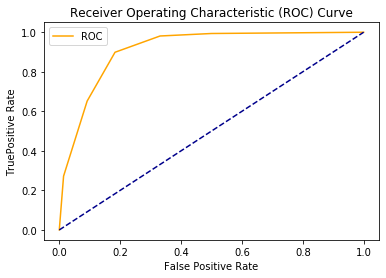

In [48]:
fpr, tpr, thresholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)

##### k-fold cross-validation (k교차검증) p.621

    - iris 데이터 활용
    - KNN 군집분석 코드
    - dataset 분할 코드

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
KNN = KNeighborsClassifier()
scores = cross_val_score(KNN, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [50]:
scores = cross_val_score(KNN, iris.data, iris.target, cv = 5)
# cv는 교차검증 횟수
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [51]:
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))

교차 검증 평균 점수 : 0.97


    - 교차 검증에 cross_validate 함수를 사용할 수 있음
    - cross_val_score 함수와 인터페이스가 비슷하지만 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환

In [55]:
res = cross_validate(KNN, iris.data, iris.target, cv = 5,
                    return_train_score = True)
display(res)

{'fit_time': array([0.        , 0.0010283 , 0.        , 0.00100327, 0.        ]),
 'score_time': array([0.00202847, 0.00098491, 0.00197554, 0.00099206, 0.00099778]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

-LOOCV p.625
    - n개의 데이터 샘플중에서 한 개의 데이터 샘플을 testset으로 하고,
    n-1개를 trainingset으로 두고 모델을 검증하는 방식

In [56]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(KNN, iris.data, iris.target, cv = loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:2f}".format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.966667


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 04. 지도학습 기법 2
    
        03. Grid Search

In [57]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state = 0)
# train_test_split(data, data2, test_size, train_size, random_state(난수시드))
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다.
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:", best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [59]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target,
                                                   random_state = 0)
# 훈련 + 검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {} 검증 세트의 크기: {} 테스트 세트의 크기: {}\n".format(X_train.shape[0],
                                                           X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다.
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수: {:.2f}".format(test_score))

# print 결과에 대한 해석은 p.631

훈련 세트의 크기: 84 검증 세트의 크기: 28 테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 04. 지도학습 기법 2
    
        04. Exploratory Data Analysis

In [63]:
titanic = pd.read_csv("C:/Users/Affinity/Desktop/study/Module03/titanic.csv", header = 0,
                     encoding = 'utf-8')
# index_col = "" 로  인덱스 지정가능

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [66]:
# Survived와 는 명목이므로 object로 바꿔줘야함
titanic["Survived"] = titanic["Survived"].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [68]:
titanic.isnull().sum()
# 이럴 경우 Cabin 변수는 그냥 지우는 수도 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


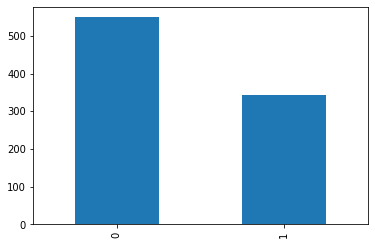

In [70]:
# 종속변수 확인
titanic['Survived'].value_counts().plot(kind = 'bar')
plt.show()

In [71]:
# 독립변수 - 명목형 변수 분포확인
category_feature = [col for col in titanic.columns if titanic[col].dtypes == 'object']
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [72]:
category_feature = list(set(category_feature) - set(['Survived']))
category_feature

['Name', 'Sex', 'Ticket', 'Pclass', 'Cabin', 'Embarked']

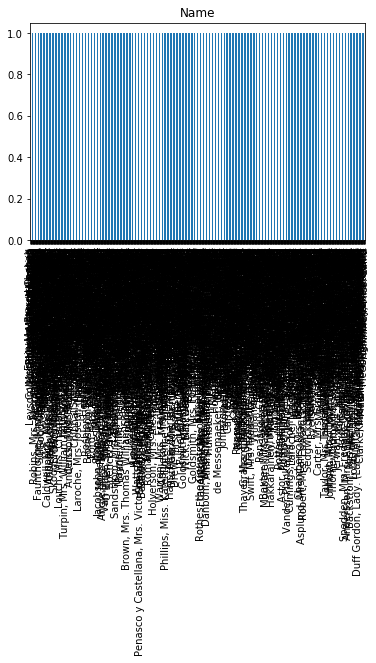

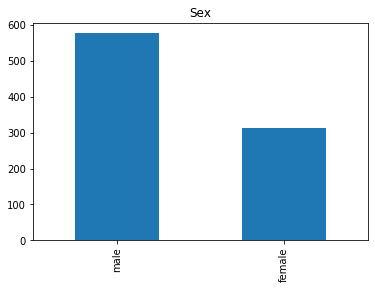

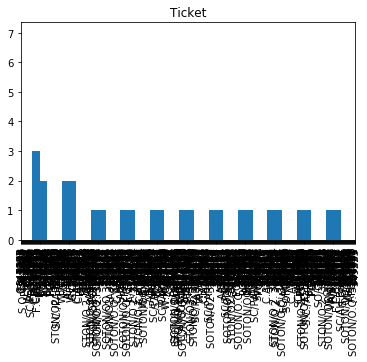

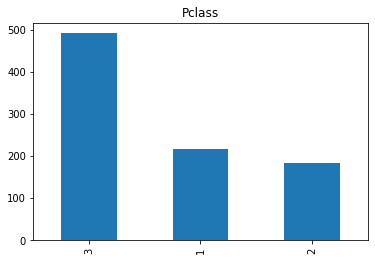

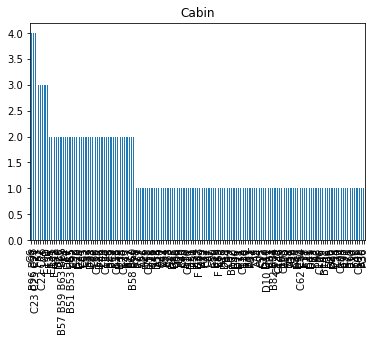

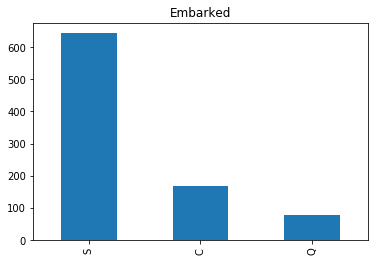

In [73]:
for col in category_feature:
    titanic[col].value_counts().plot(kind = 'bar')
    plt.title(col)
    plt.show()

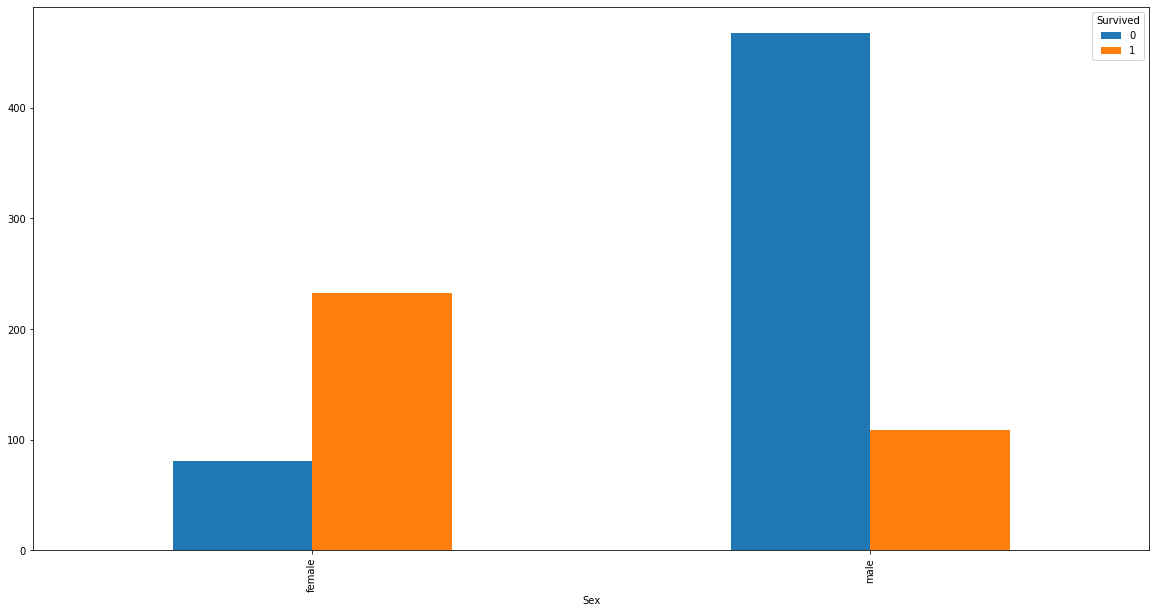

In [74]:
# 명목형 변수 분포확인
sex_df = titanic.groupby(['Sex', 'Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind = 'bar', figsize = (20, 10))
plt.show()

In [76]:
# 수치형 변수 분포확인
numerical_feature = list(set(titanic.columns) - set(category_feature)
                        - set(['PassengerID', 'Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'PassengerId', 'SibSp'], dtype='<U11')

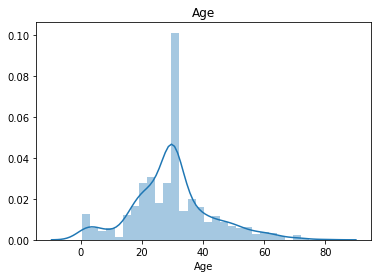

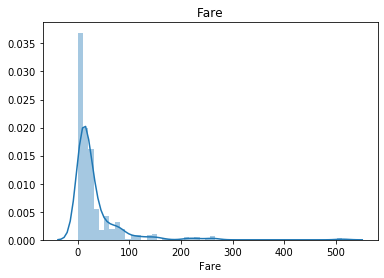

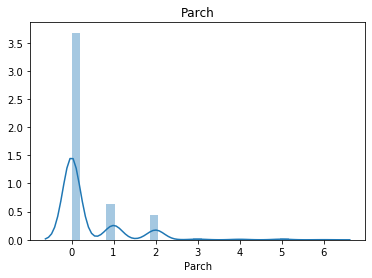

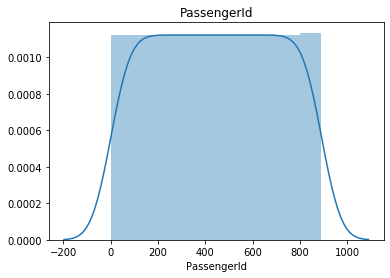

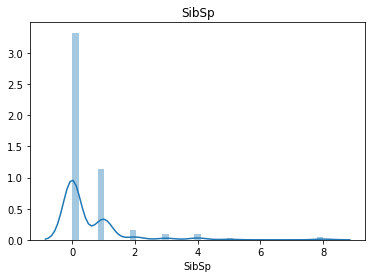

In [77]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

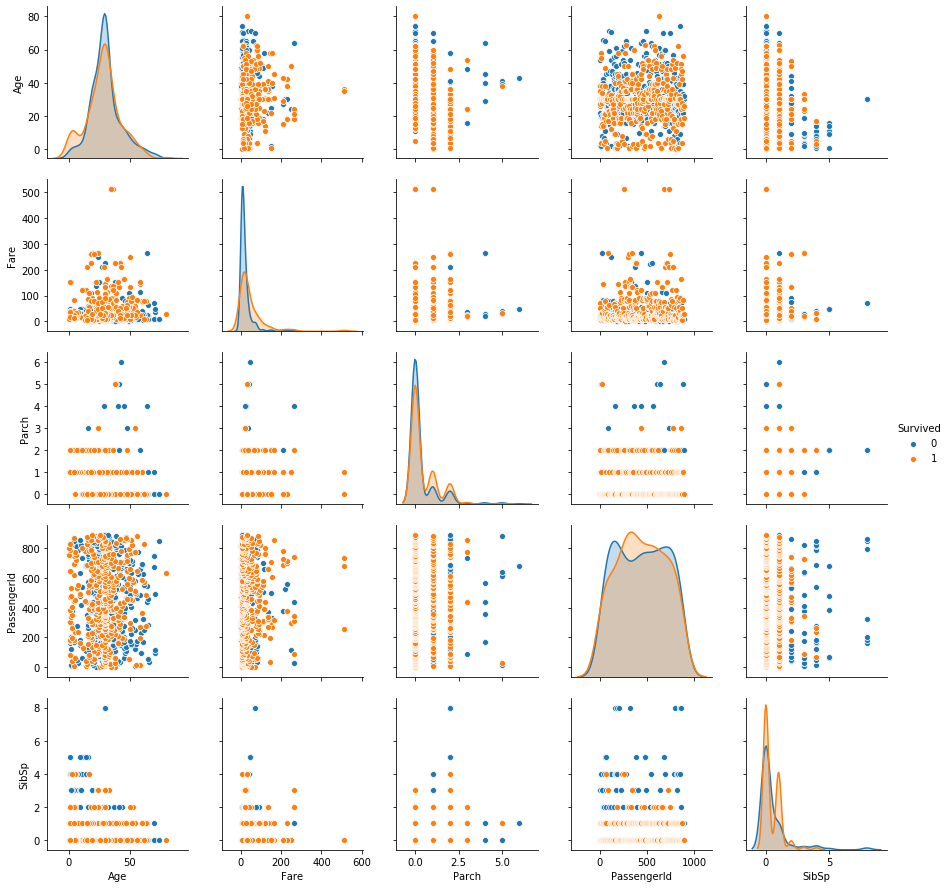

In [78]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue = 'Survived',
            x_vars = numerical_feature, y_vars = numerical_feature)
# hue는 카테고리형 변수이름을 설정하여 카테고리별 다른 출력값을 줄 수 있음
plt.show()

In [3]:
# 훈련 데이터, 테스트 데이터를 읽어온다
#trn = pd.read_csv("C:/Users/Affinity/Desktop/study/Module03/ssd_train.csv", na_values = ['-1', '-1.0'])
#tst = pd.read_csv("C:/Users/Affinity/Desktop/study/Module03/ssd_test.csv", na_values = ['-1', '-1.0'])
# 집에서 할 떄
trn = pd.read_csv("C:/Users/SAMSUNG/Desktop/new/module3/ssd_train.csv", na_values = ['-1', '-1.0'])
tst = pd.read_csv("C:/Users/SAMSUNG/Desktop/new/module3/ssd_test.csv", na_values = ['-1', '-1.0'])

In [4]:
# 데이터의 크기를 확인한다
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [5]:
# 데이터 첫 5줄을 확인한다.
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [6]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [7]:
# 변수의 최대값, 최소값 등을 확인한다.
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# 변수의 결측값을 확인한다
trn.isnull().sum(axis = 0)
tst.isnull().sum(axis = 0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [9]:
np.unique(trn['target'])
# 이진변수라는 뜻

array([0, 1], dtype=int64)

In [10]:
1.0 * sum(trn['target']) / trn.shape[0]
# 1인 값을 다 더한 후 전체로 나누면 1의 비율을 확인할 수 있음
# 타겟 변수가 1일 확률이 매우 낮은 불균형한 데이터

0.036447517859182946

In [11]:
# 훈련 데이터와 테스트 데이터를 통합한다
tst['target'] = np.nan
df = pd.concat([trn, tst], axis = 0)

C:\Users\SAMSUNG\Desktop\new\anacanda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
# 시각화 관련 라이브러리를 불러온다.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
# 시각화 관련 함수를 미리 정의한다.
def bar_plot(col, data, hue = None):
    f, ax = plt.subplots(figsize = (10, 5))
    sns.countplot(x = col, hue = hue, data = data, alpha = 0.5)
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize = (10, 5))
    sns.distplot(data[col].dropna(), kde = False, bins = 10)
    plt.show()
    
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize = (10, 5))
    sns.barplot(x = col, y = 'target', data = data)
    plt.show()

In [104]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
a = list(tst.columns)
binary = []
for x in a:
    if 'bin' in x:
        binary.append(x)
        
# 범주형 변수
category = []
for y in a:
    if y[-3:] == 'cat':
        category.append(y)
        
# 정수형 변수
integer = []
for i in range(1, len(a)-1): # id와 target 제외
    if trn[a[i]].dtype == np.int64 and a[i] not in binary + category:
        integer.append(a[i])
        
# 소수형 변수 -> 질문하기 (데이터는 1.0 2.0 3.0 이런 정수이자 소수형 그럼 분류는?)
floats = []
for z in range(1, len(a)-1):
    if trn[a[z]].dtype == np.float64 and a[z] not in binary + category:
        floats.append(a[z])

# 이거 자료처리 정수형, 소수형 중 어떻게 할지 질문하기

In [79]:
tst.ps_car_11

0         1.0
1         1.0
2         3.0
3         2.0
4         3.0
5         2.0
6         2.0
7         3.0
8         2.0
9         2.0
10        3.0
11        3.0
12        2.0
13        1.0
14        2.0
15        0.0
16        1.0
17        3.0
18        3.0
19        2.0
20        3.0
21        2.0
22        2.0
23        2.0
24        3.0
25        3.0
26        3.0
27        2.0
28        2.0
29        1.0
         ... 
892786    1.0
892787    3.0
892788    3.0
892789    2.0
892790    1.0
892791    2.0
892792    2.0
892793    3.0
892794    2.0
892795    0.0
892796    3.0
892797    0.0
892798    2.0
892799    2.0
892800    2.0
892801    2.0
892802    3.0
892803    3.0
892804    3.0
892805    2.0
892806    3.0
892807    2.0
892808    3.0
892809    2.0
892810    1.0
892811    2.0
892812    2.0
892813    2.0
892814    3.0
892815    1.0
Name: ps_car_11, Length: 892816, dtype: float64

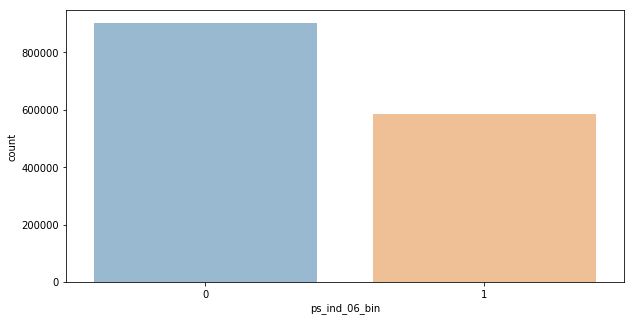

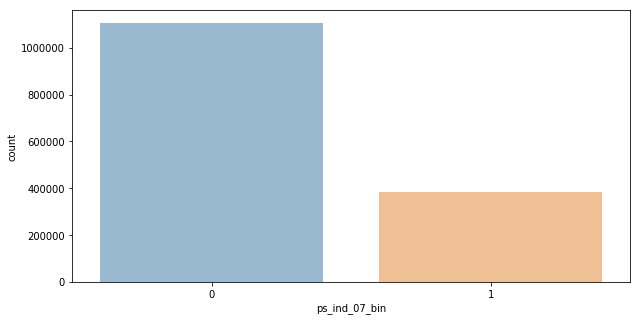

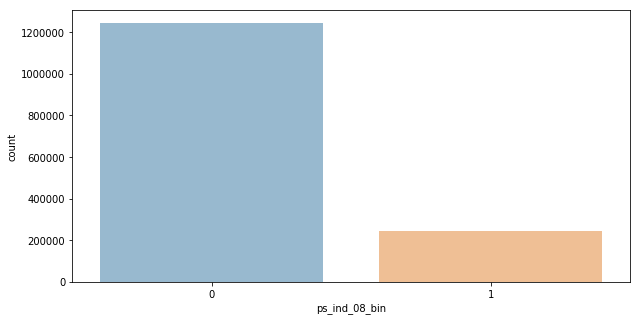

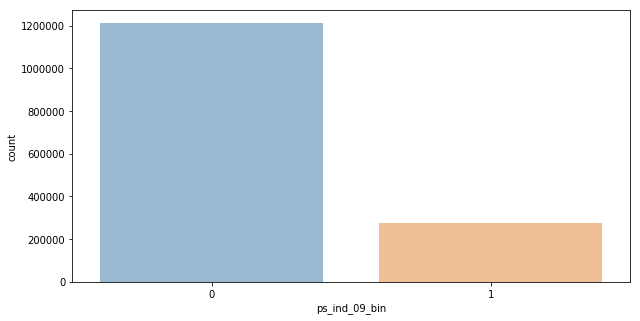

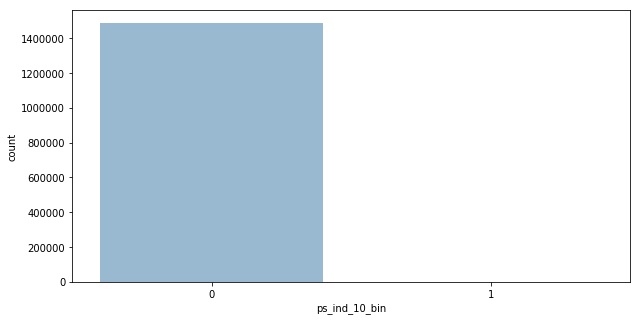

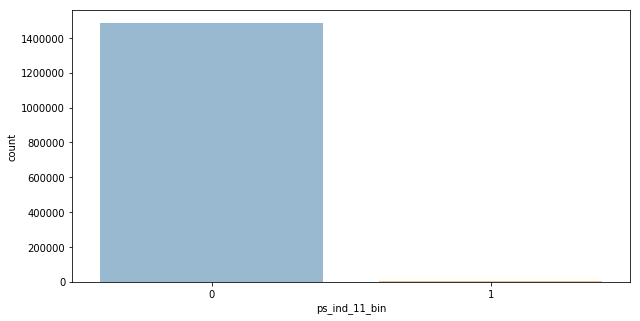

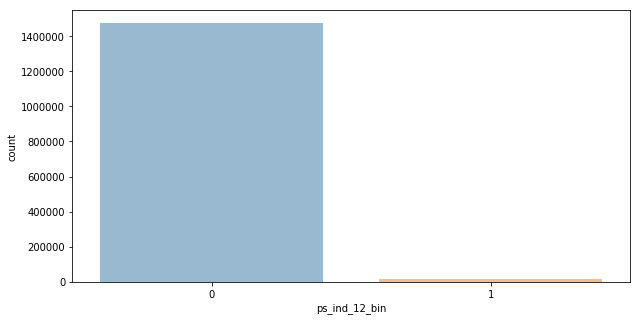

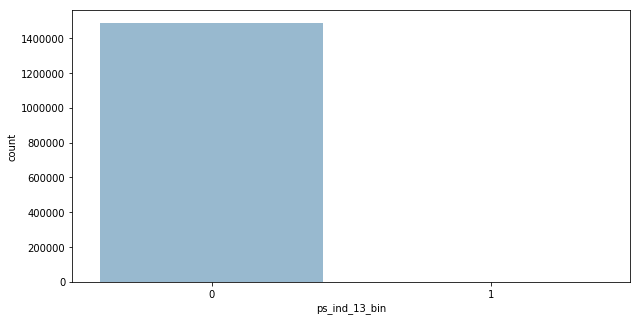

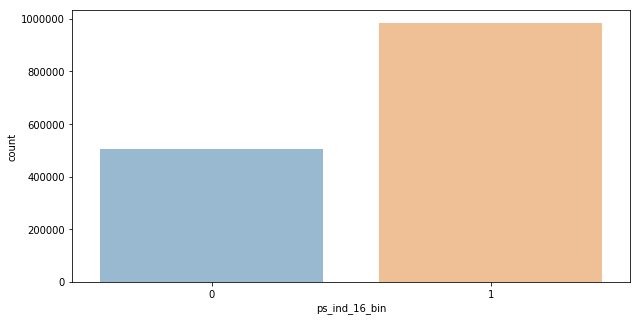

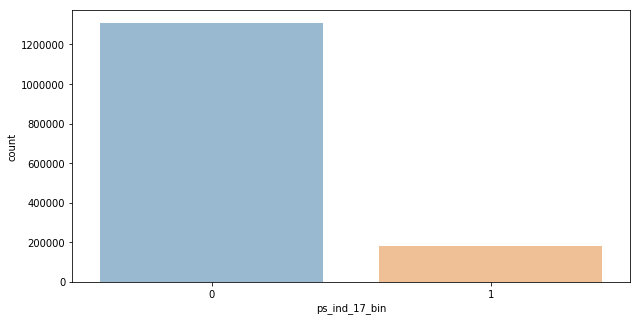

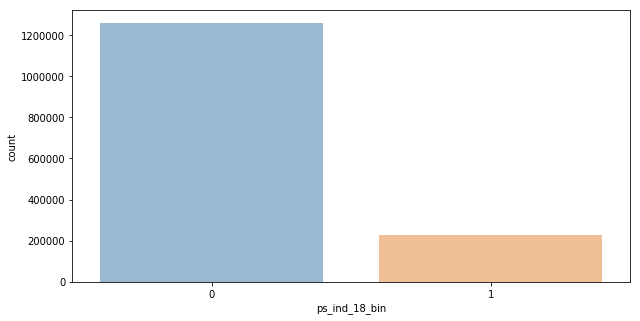

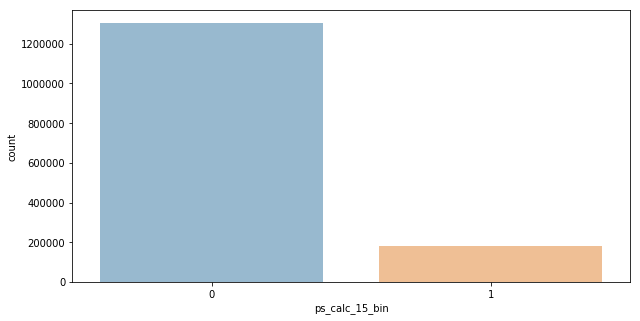

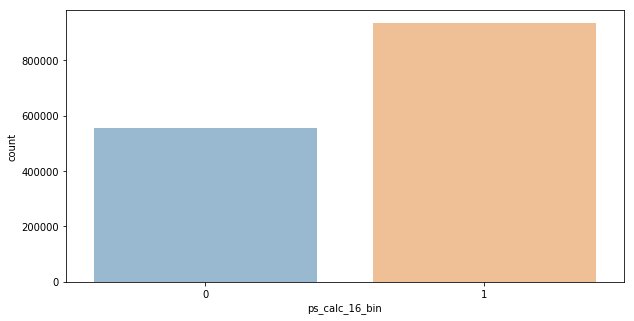

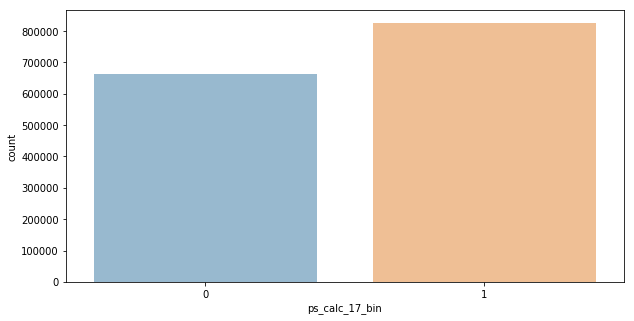

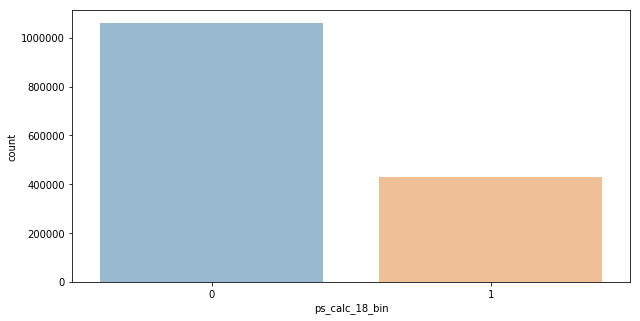

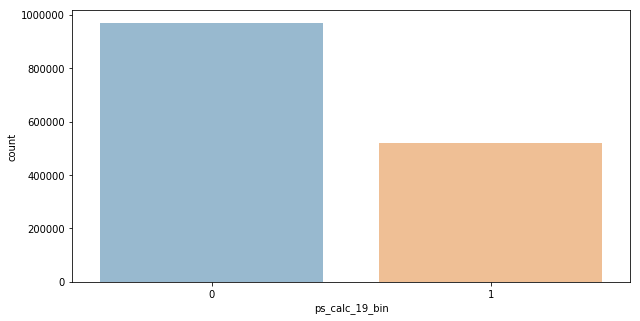

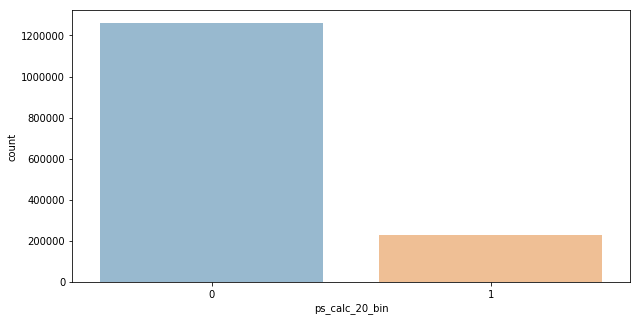

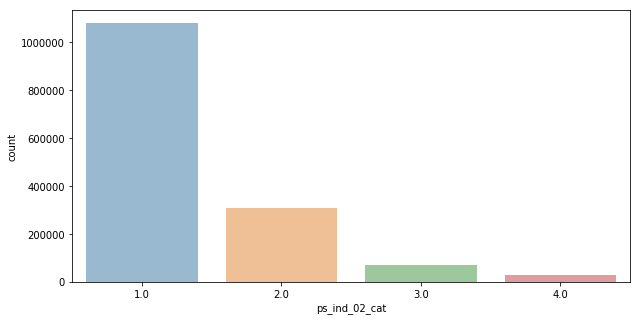

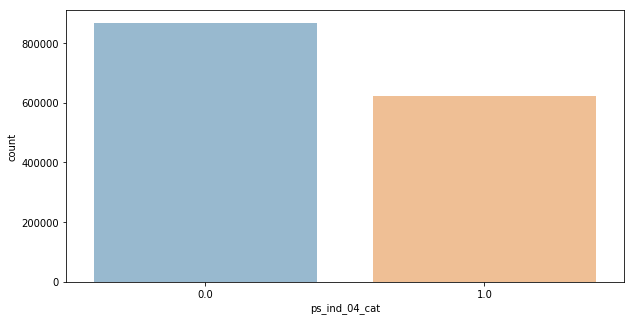

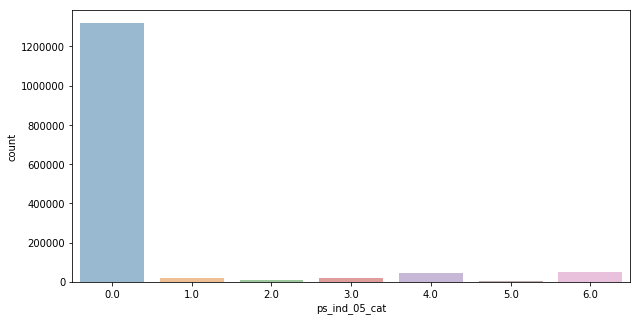

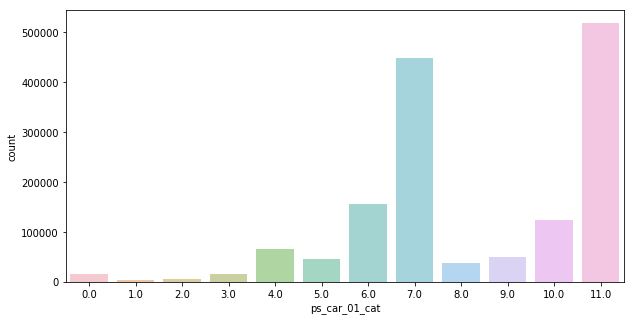

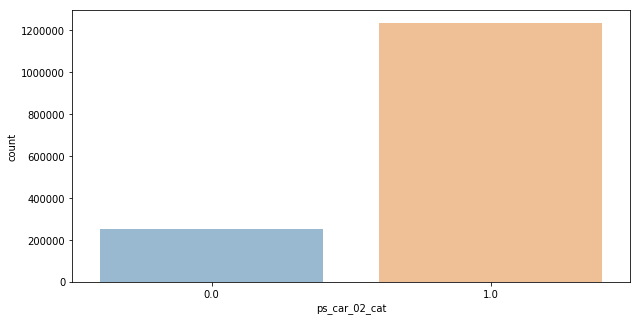

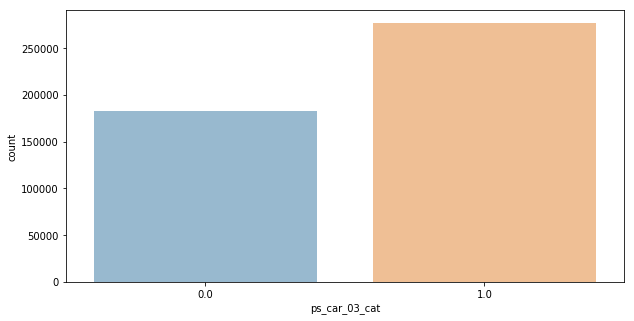

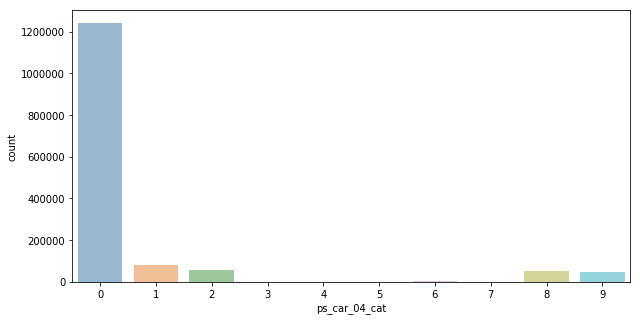

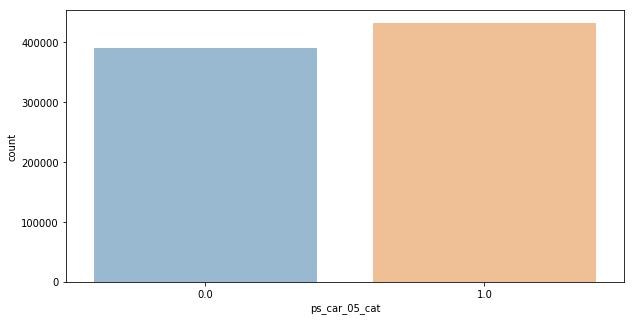

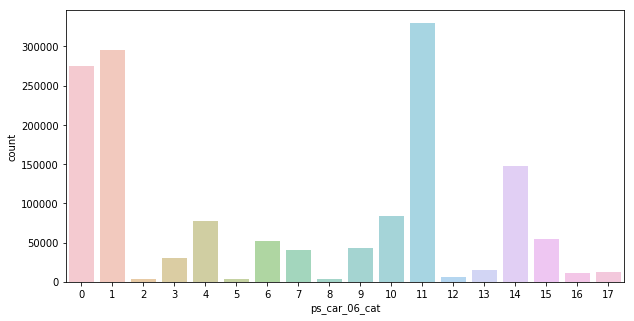

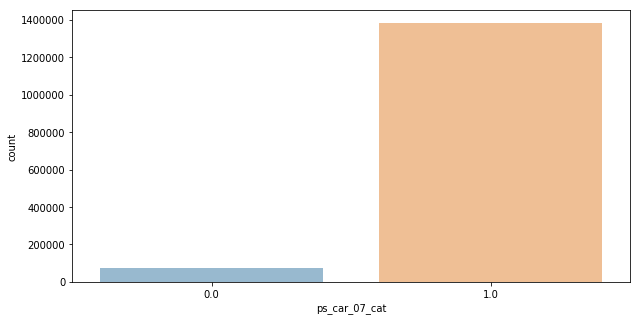

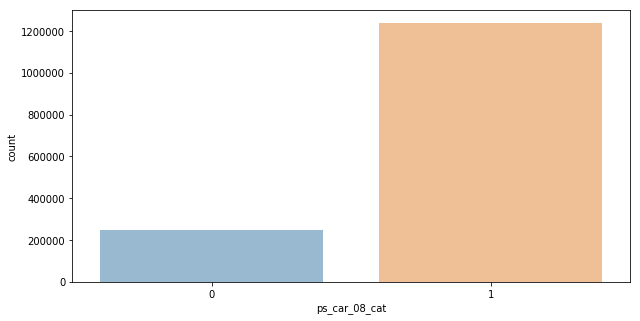

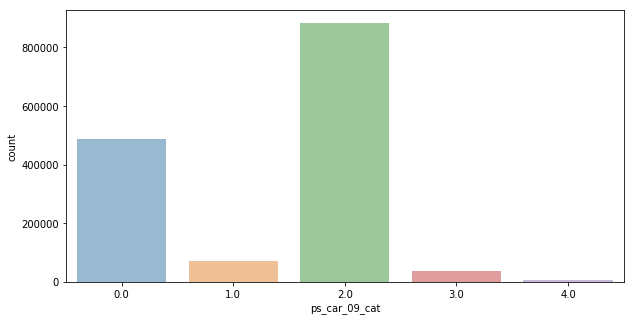

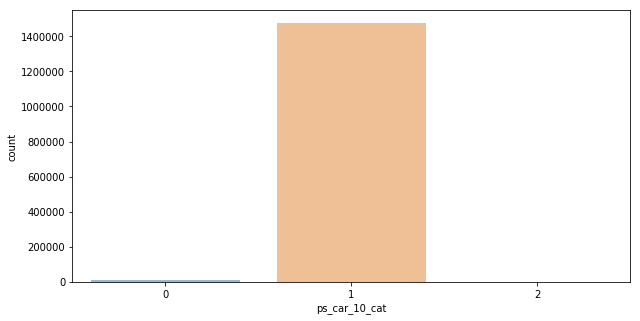

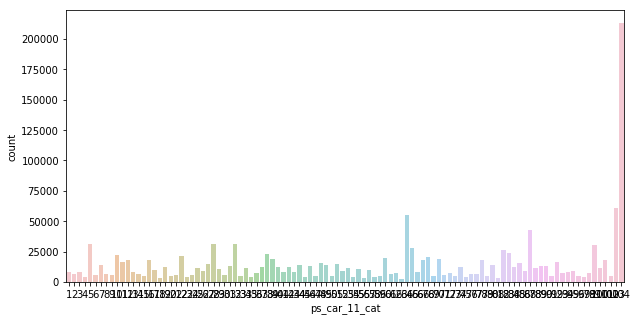

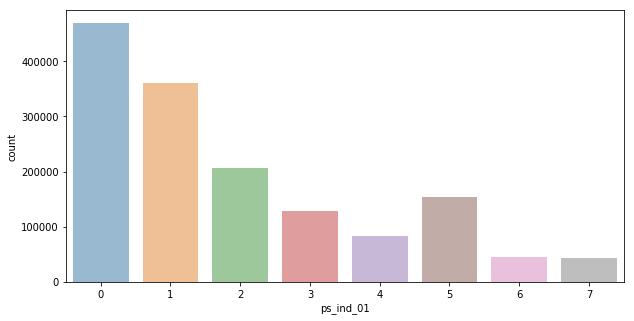

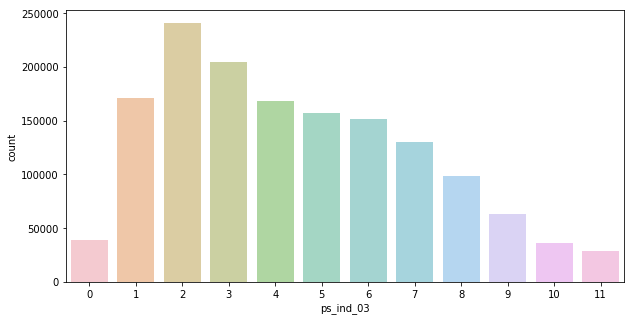

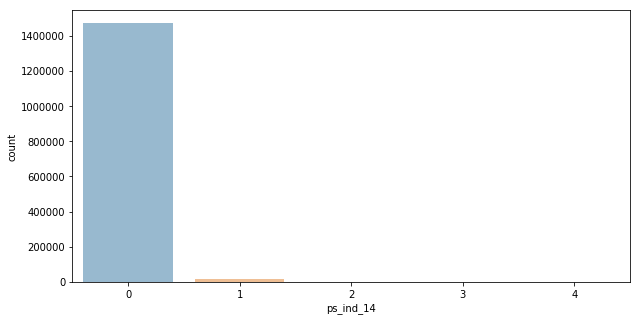

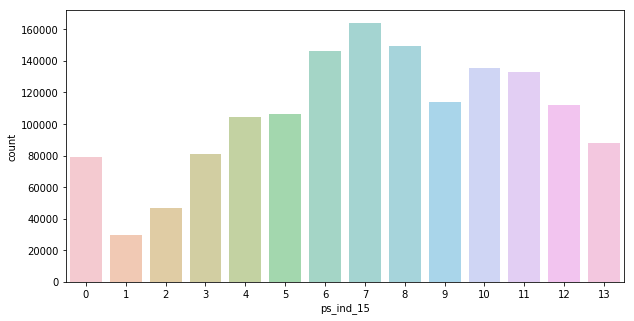

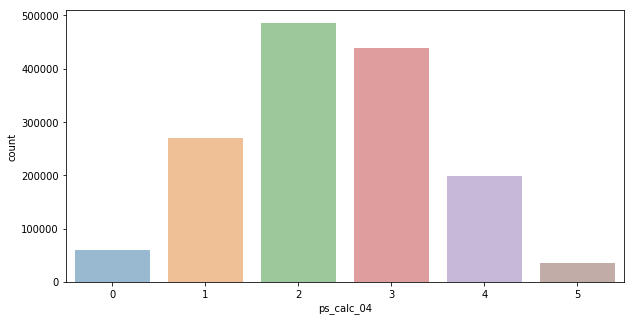

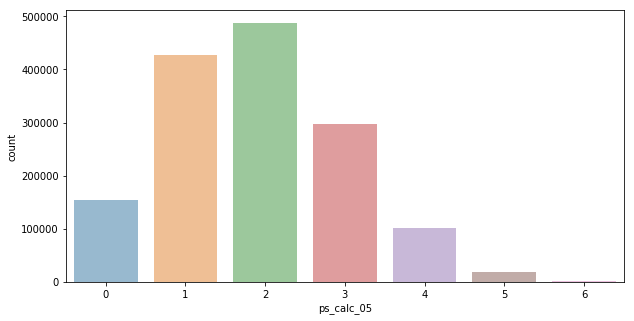

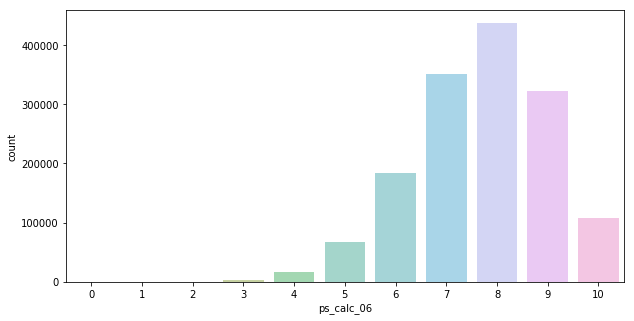

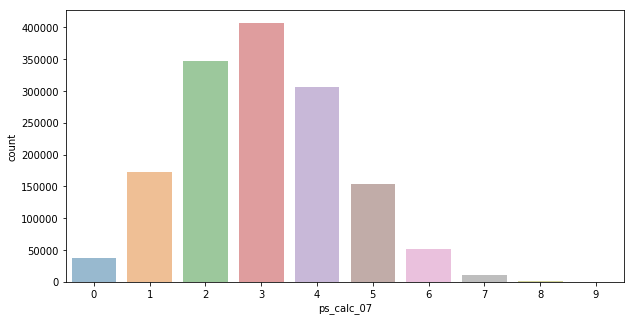

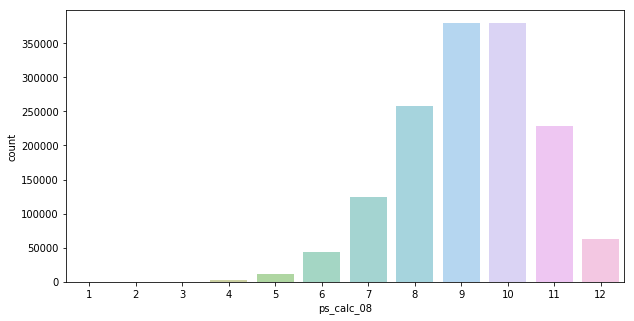

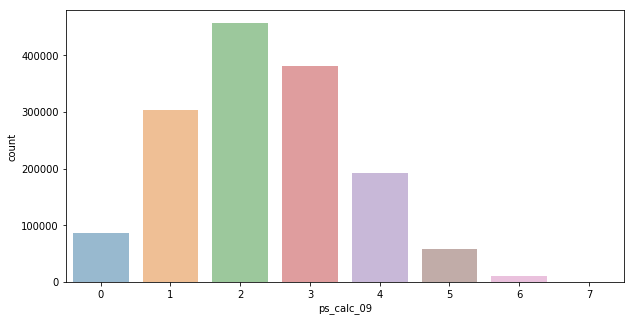

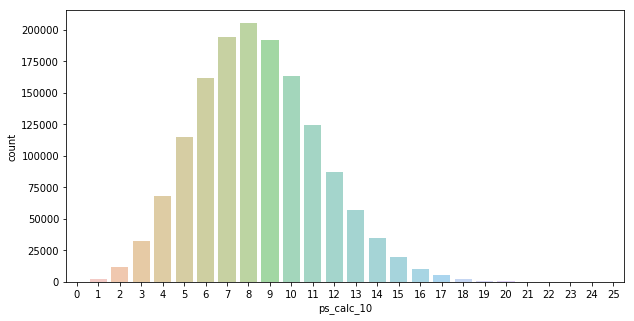

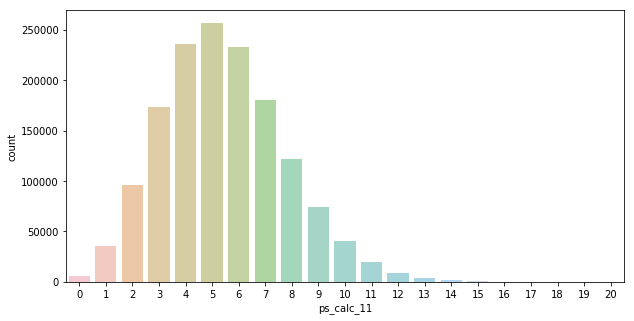

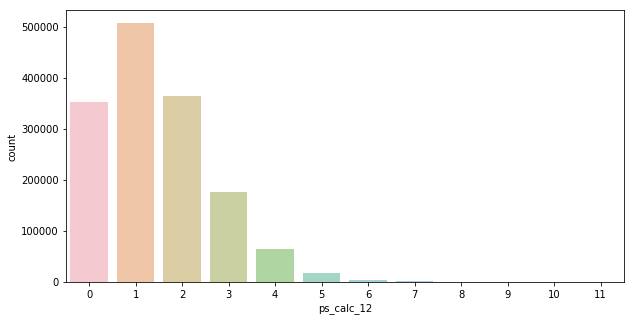

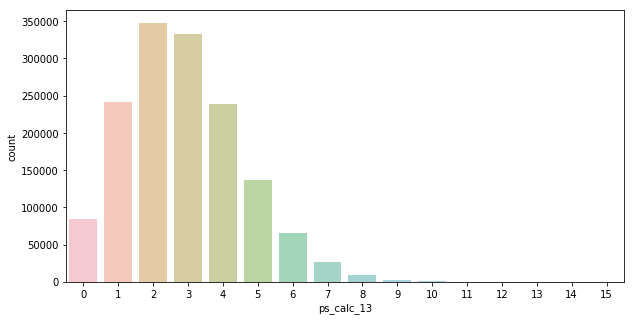

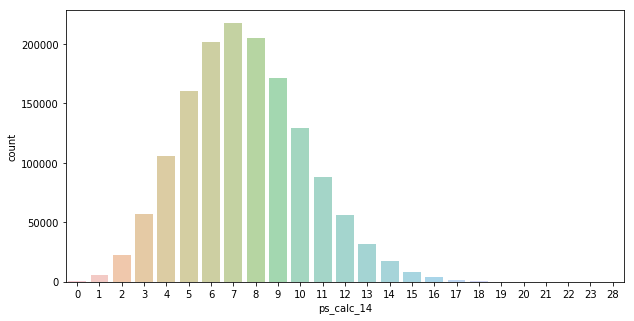

In [80]:
# 시각화로 변수 살펴보기 - 단일변수 히스토그램
for col in binary + category + integer:
    bar_plot(col, df)
    # df는 trn과 tst concat시킨 데이터프레임

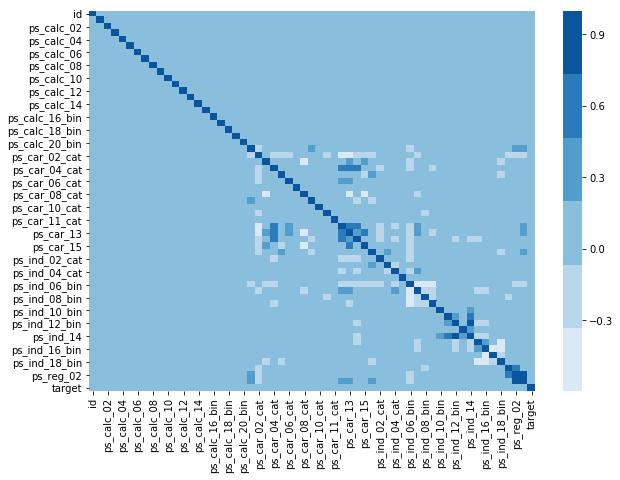

In [94]:
# 변수 간 상관관계 (시각화)
corr = df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corr, cmap = cmap)

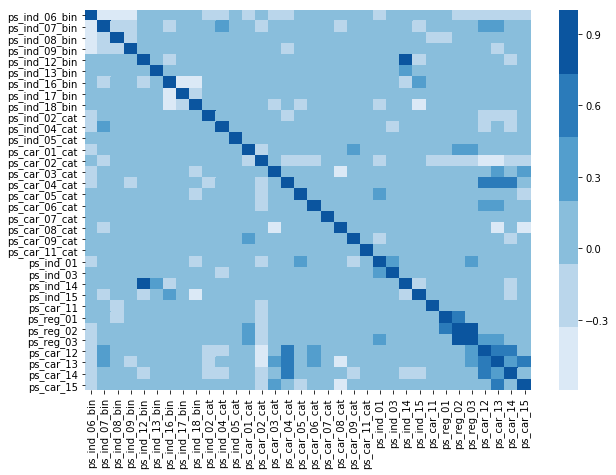

In [96]:
# 변수 간 상관관계
# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
           'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 
           'ps_ind_18_bin', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 
           'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 
           'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 
           'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 
           'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_reg_01', 'ps_reg_02', 
           'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
corr_sub = df[features].corr()
f, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(corr_sub, cmap = cmap)

##### 밑에 매우 중요 (모듈 3_파이썬을 활용한 기계학습_4장_지도학습 기법 2_jmkim20190618  p.106)

    - 단일 변수의 고유값별로 타겟 변수의 비율을 시각화(변수들의 예측 능력을 가늠하기 위한)
    - 변수 예측 능력의 통계적 유효성을 확인하기 위하여, 변수의 고유값별로 95%의 신뢰구간을 함께 시각화
    
-해석 (ppt 참조가 더욱 직관적)

    - 전체 데이터 기준 타겟 변수의 비율은 3.6%
    - 막대 그래프 중간에 그려진 검정색 직선은 95% 신뢰 구간을 의미 (신뢰구간이 넓으면 변수로써의 예측 능력 떨어짐)
    - ps_ind_16_bin, ps_ind_06_bin 두 변수는 이진 변수의 값에 따라 타겟 변수의 비율이 다름
    - 통계적 유효성을 충분히 지닌 두 변수는 모델링 관점에서 유용한 변수 라고 할 수 있음
    - ps_ind_11_bin은 평균값 기준으로는 타겟 변수의 비율이 유의미하게 달라 보이지만, 통계적 유효성이 없음
    - ps_calc_18_bin은 평균 타겟 비율에서 큰 차이를 찾기 어려움
    - 이는 변수로써의 예측 능력이 낮음을 의미


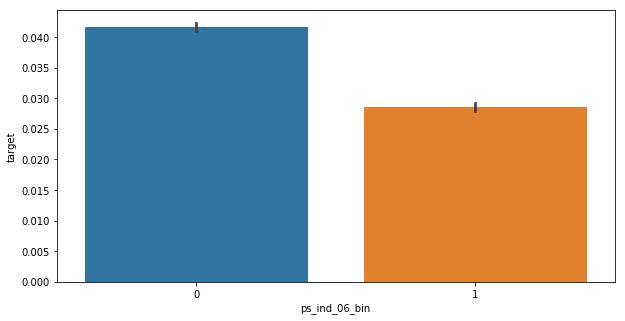

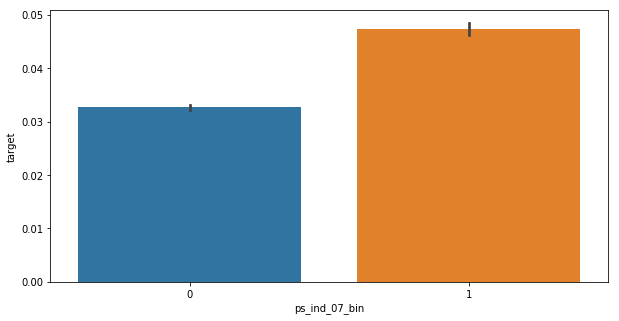

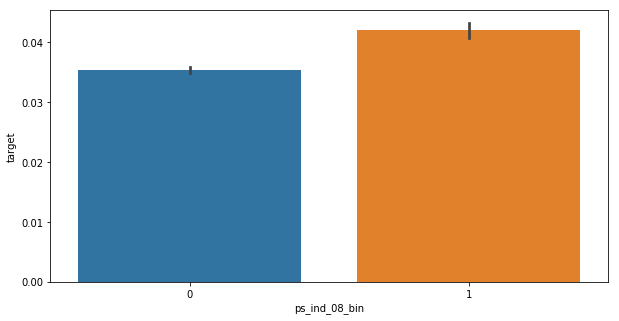

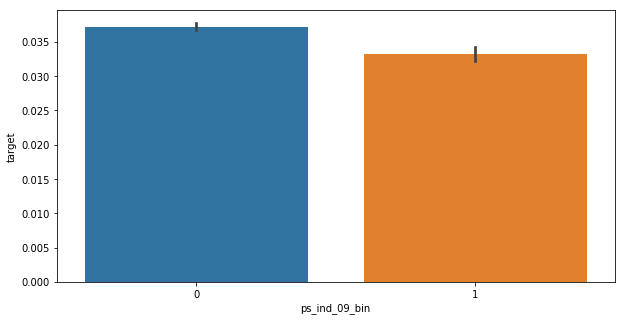

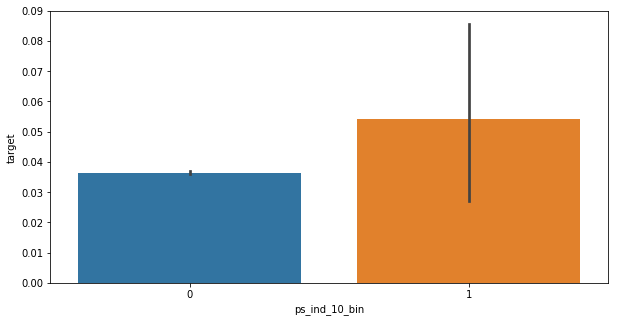

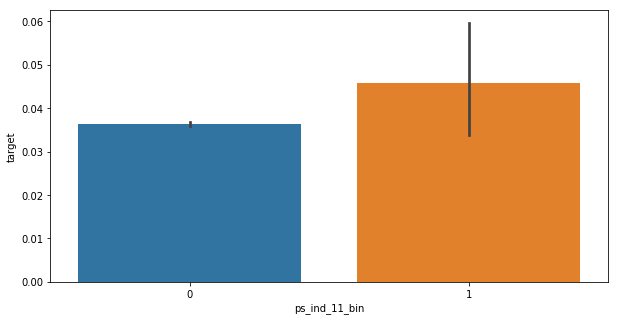

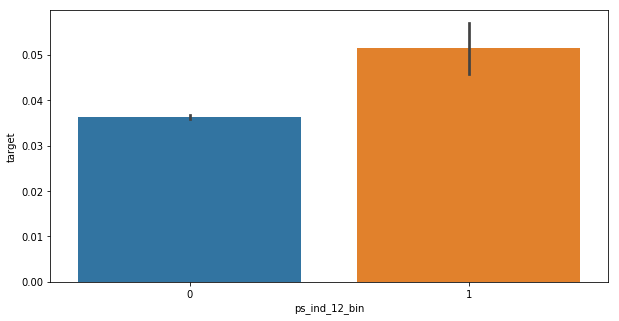

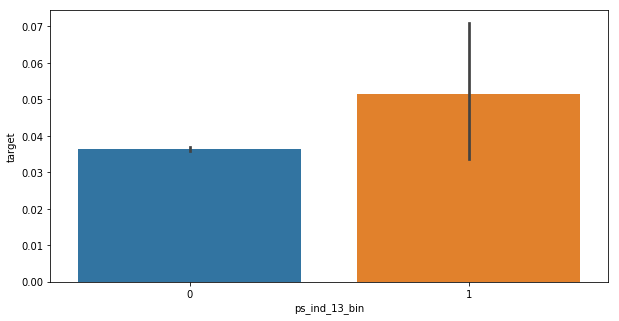

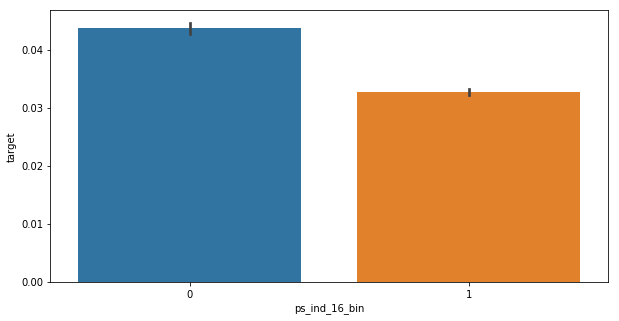

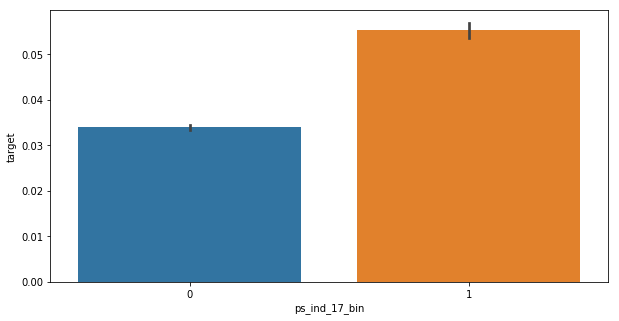

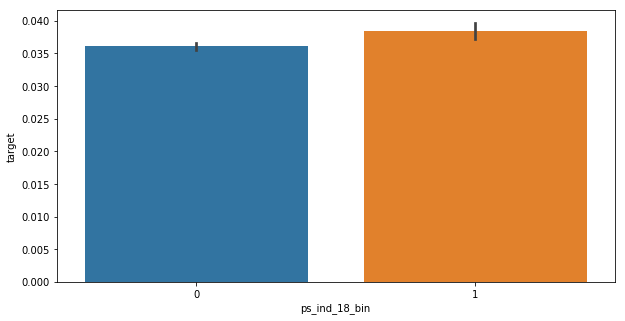

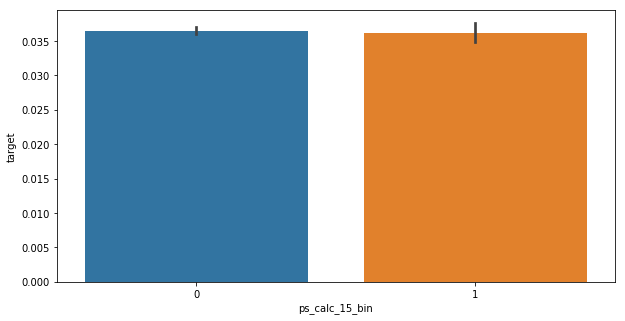

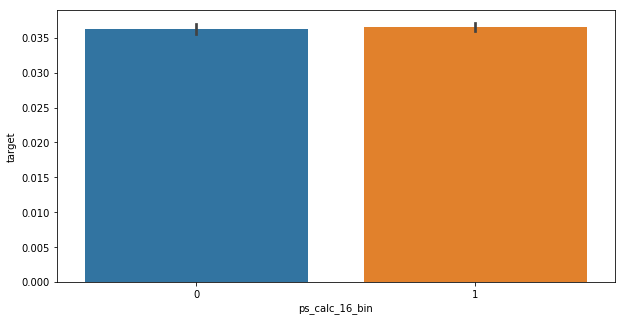

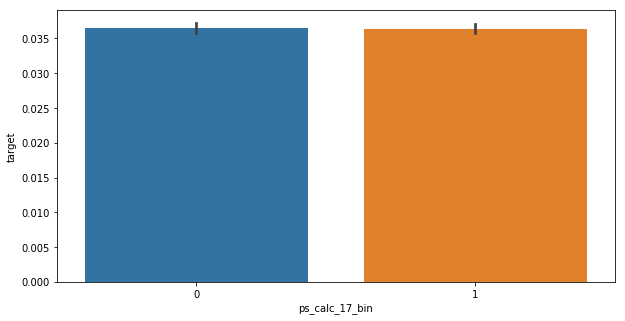

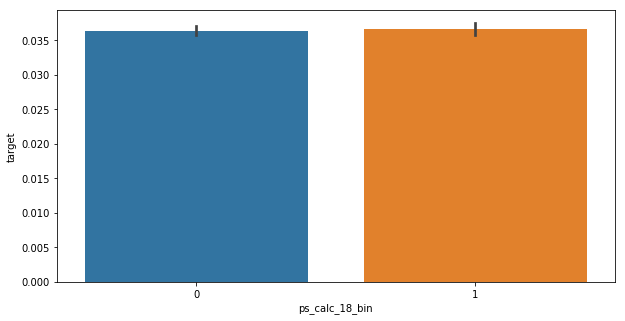

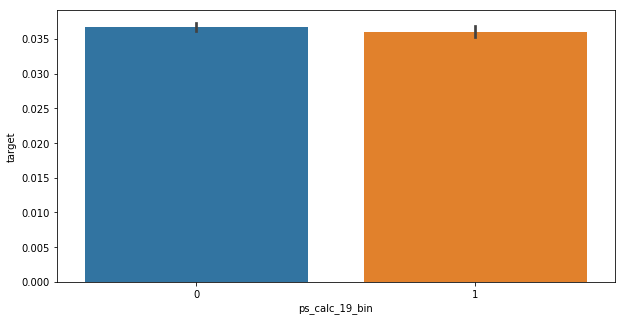

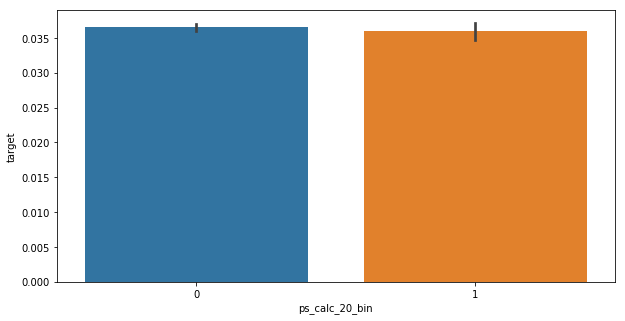

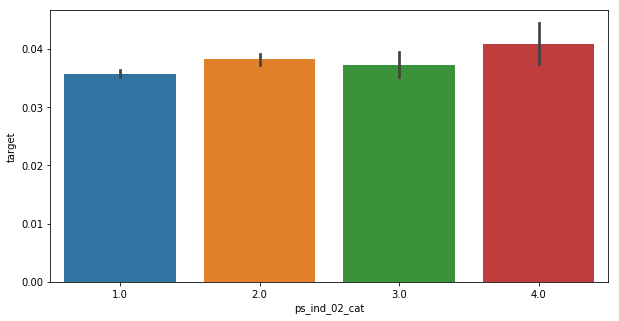

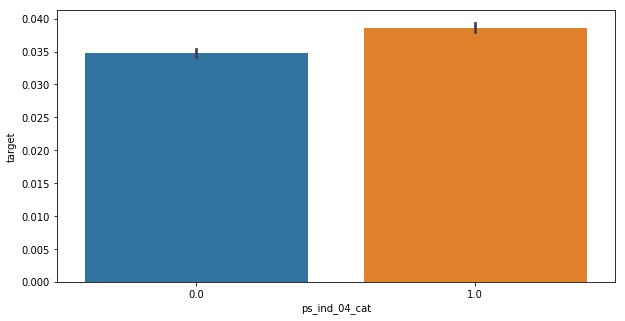

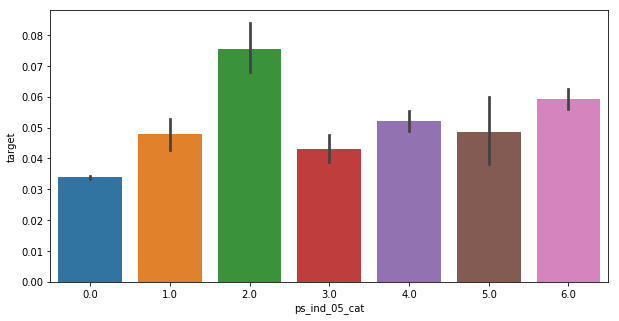

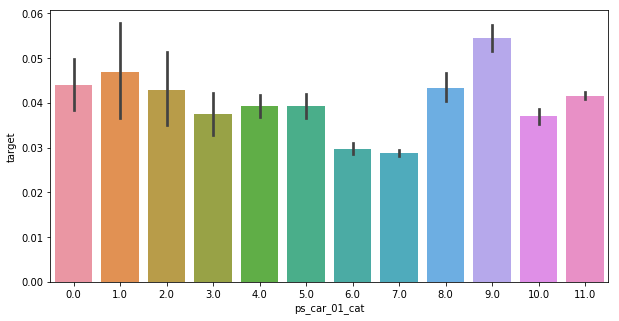

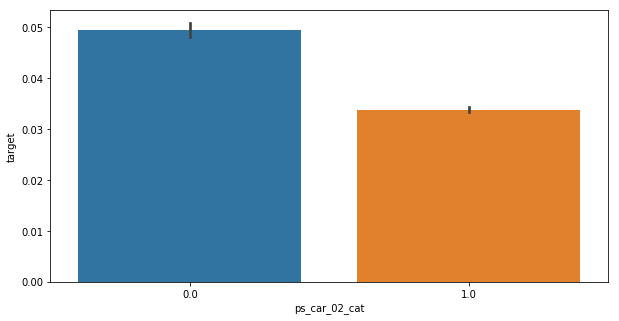

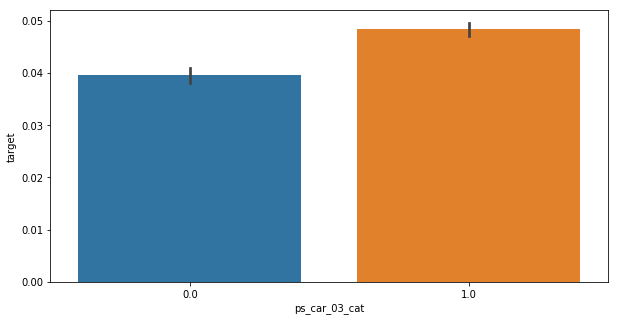

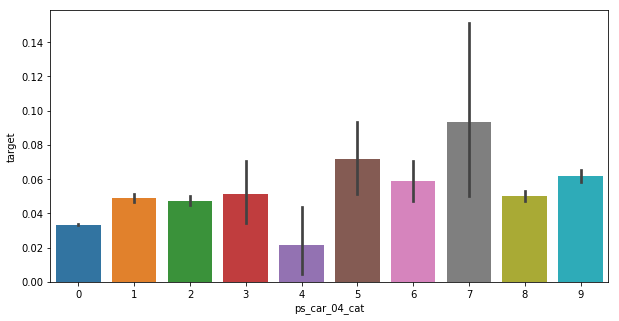

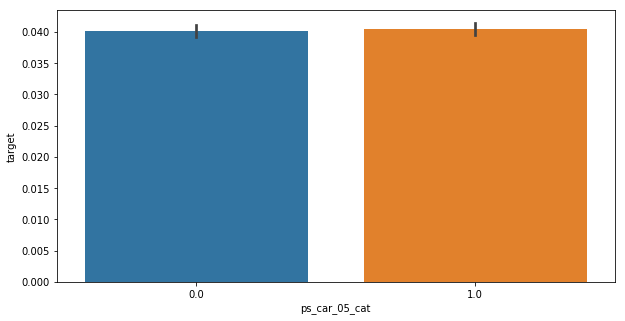

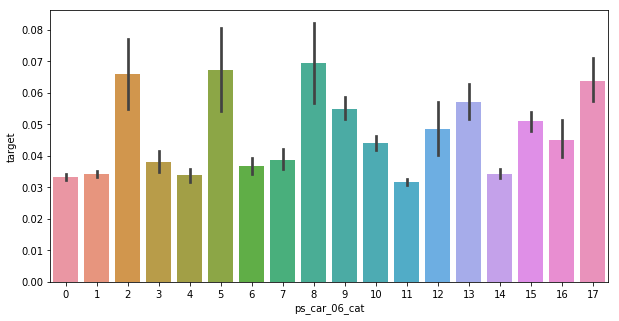

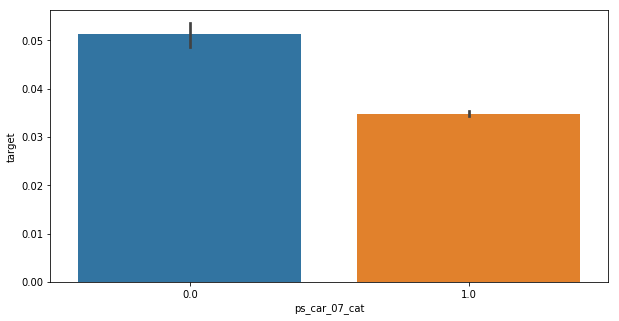

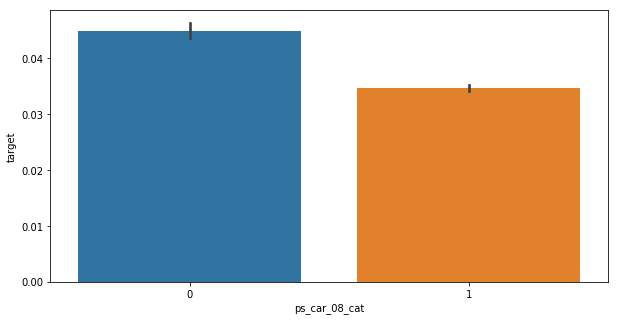

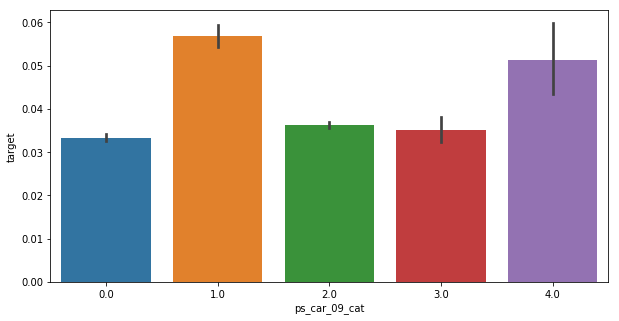

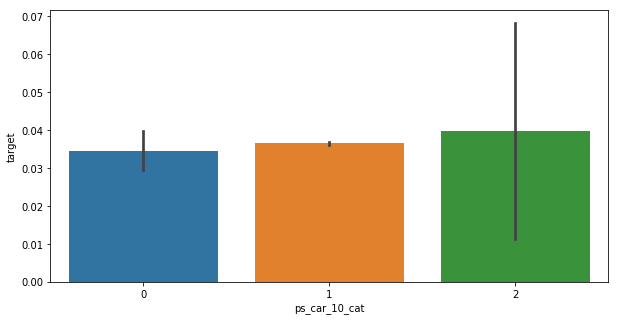

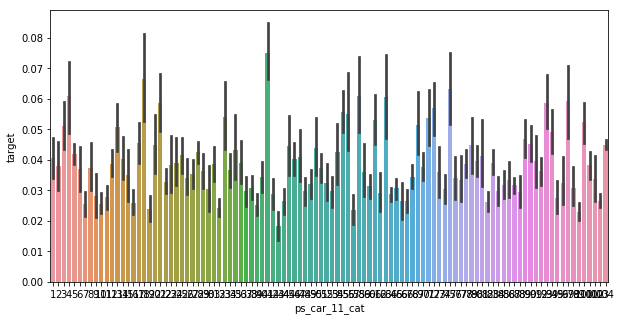

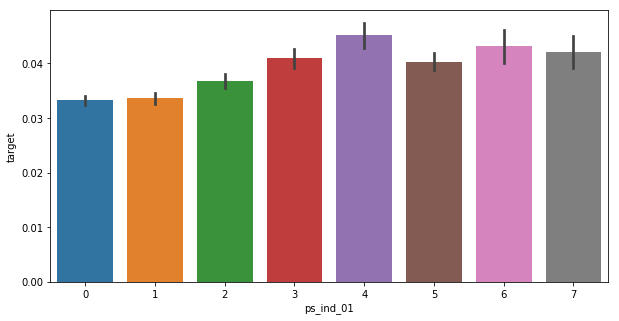

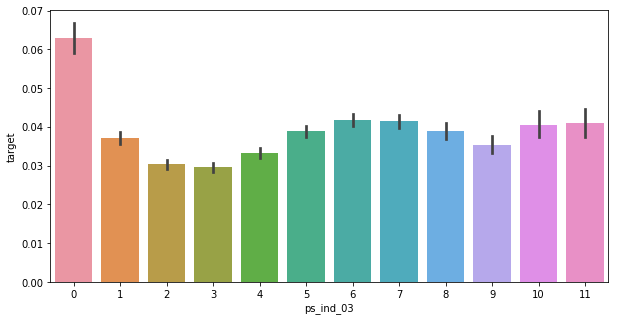

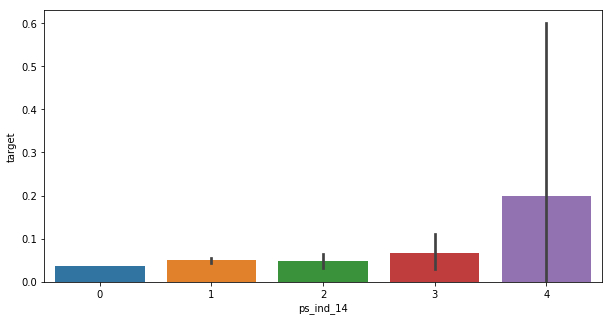

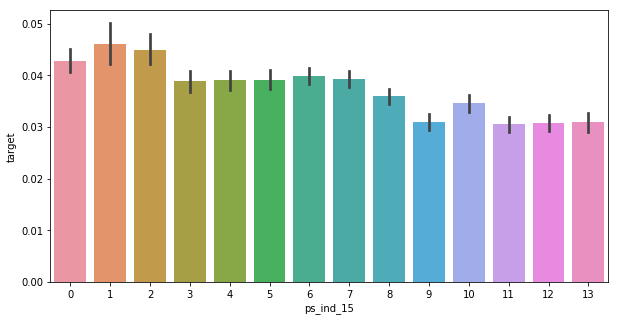

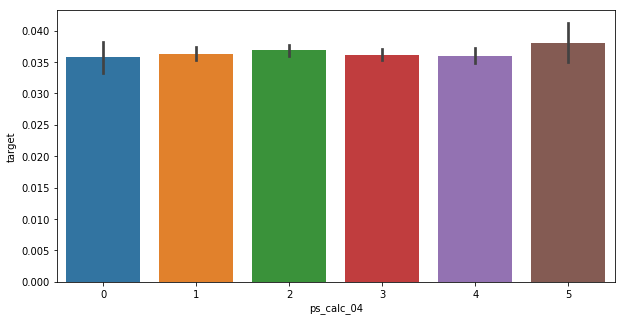

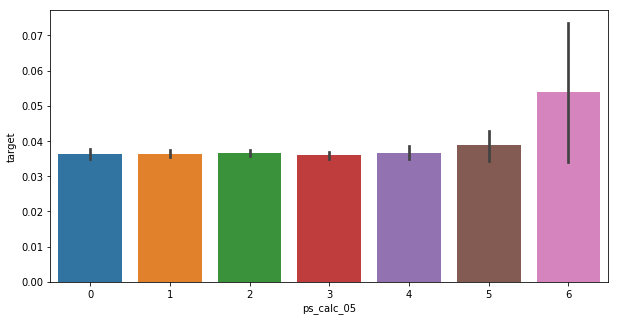

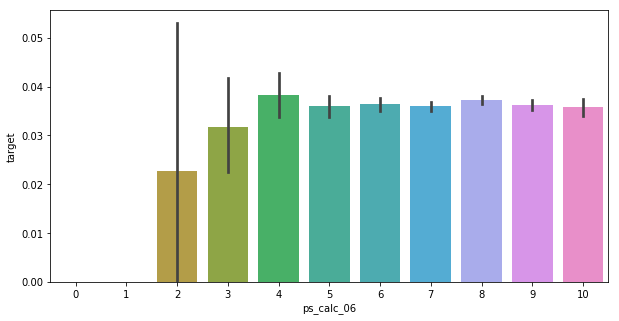

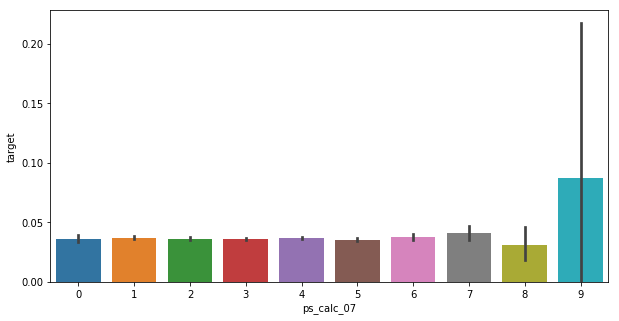

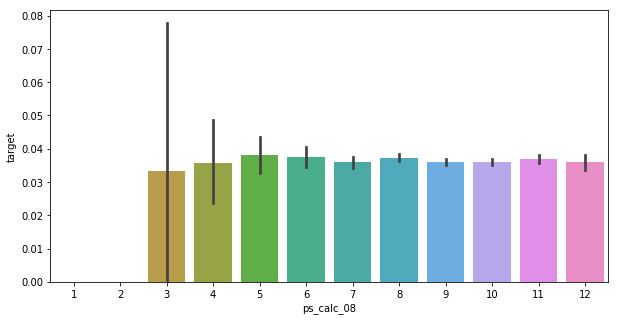

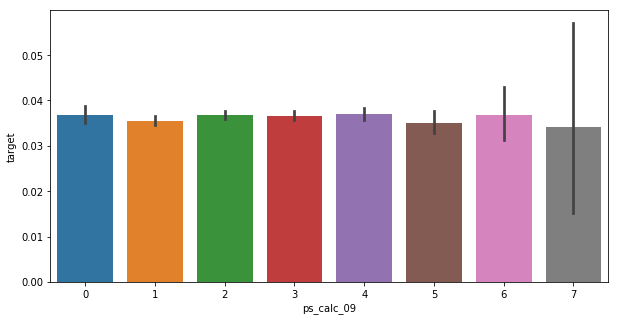

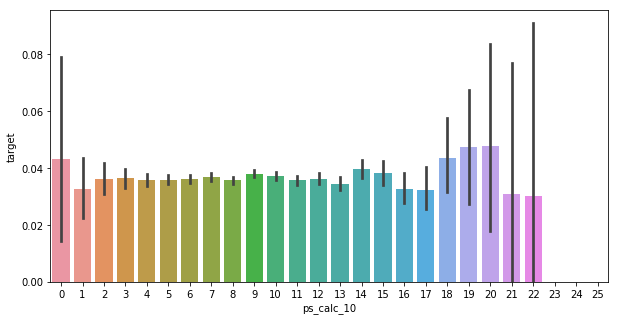

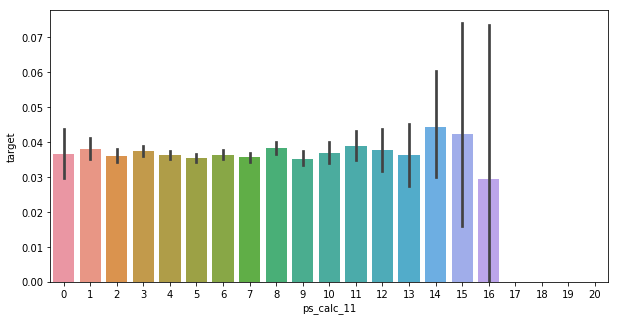

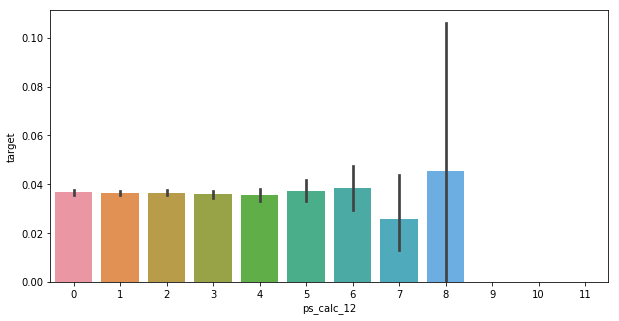

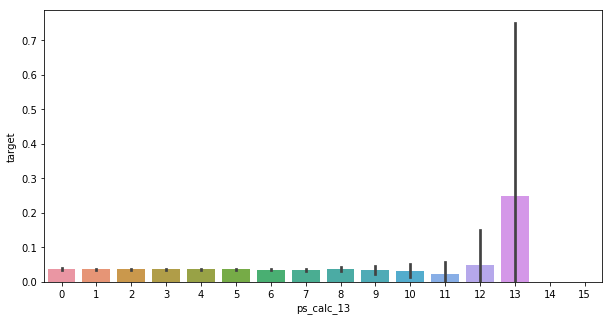

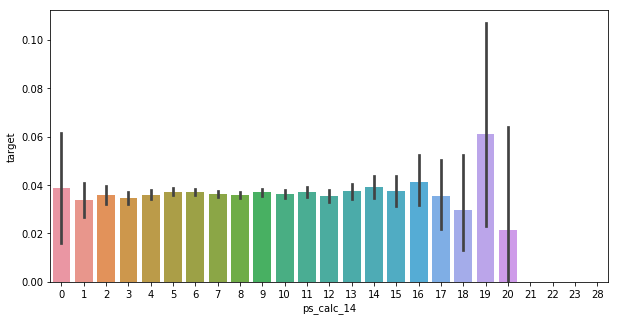

In [97]:
# 단일 변수 vs 타겟 변수
# 단일 변수의 고유값별로 타겟 변수의 비율을 시각화(변수들의 예측 능력을 가늠하기 위한)
# 변수 예측 능력의 통계적 유효성을 확인하기 위하여, 변수의 고유값별로 95%의 신뢰구간을 함께 시각화
for col in (binary + category + integer):
    bar_plot_ci(col, df)

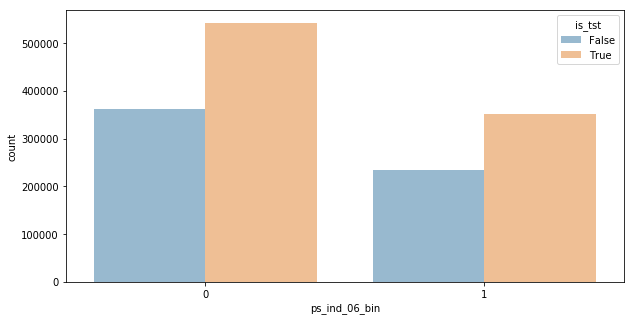

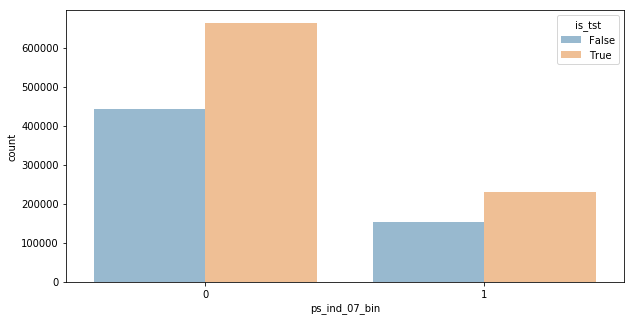

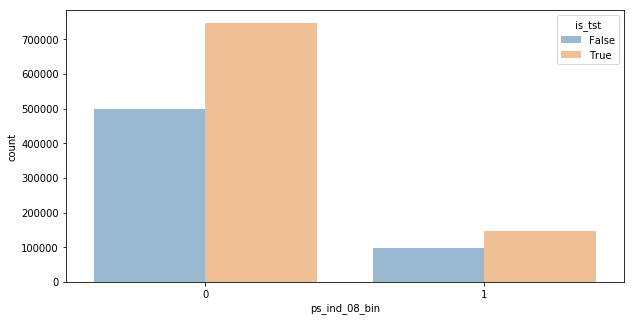

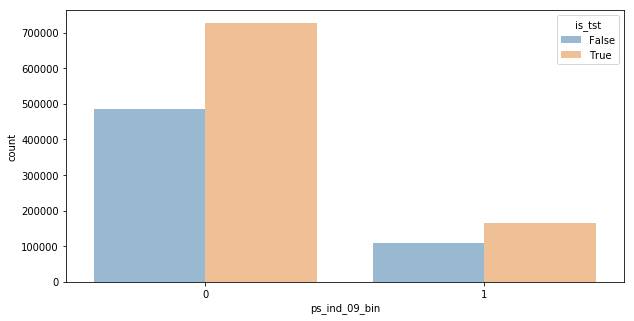

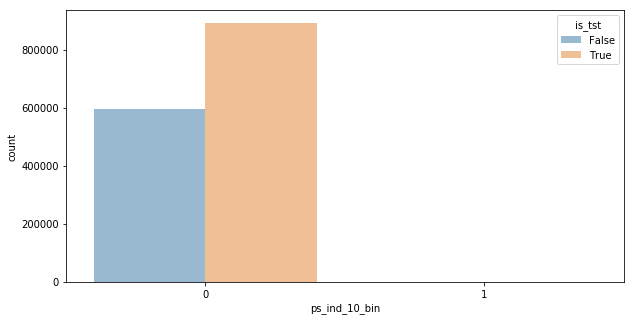

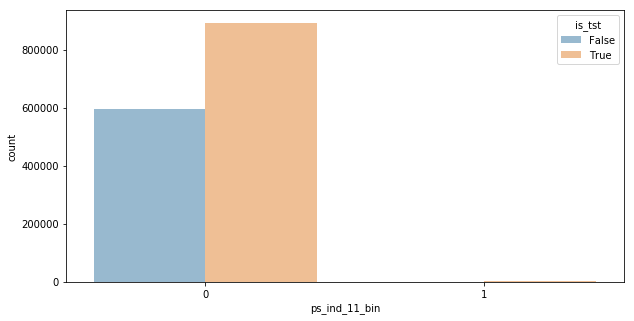

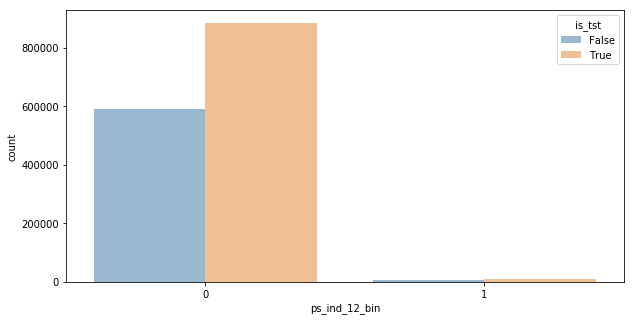

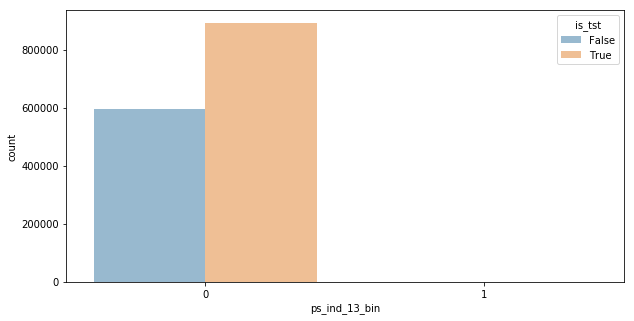

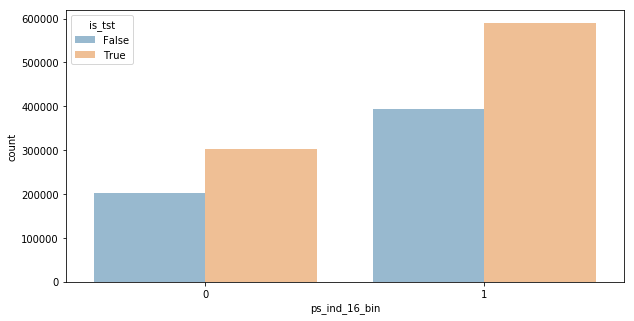

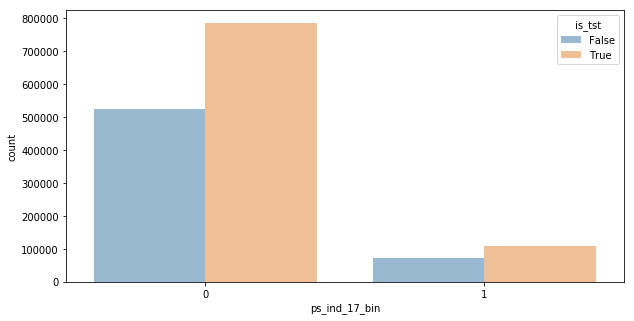

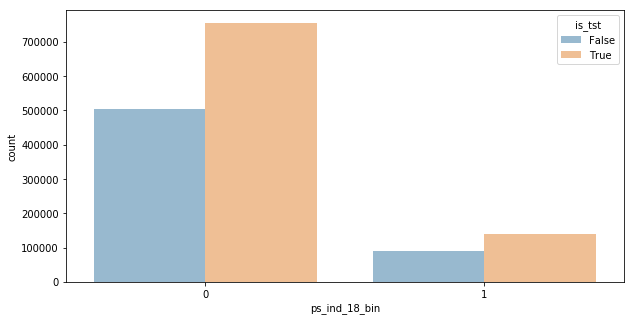

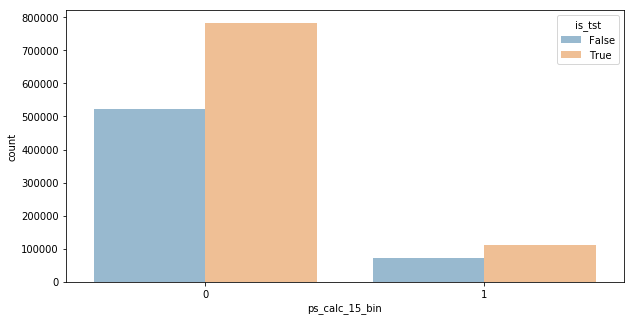

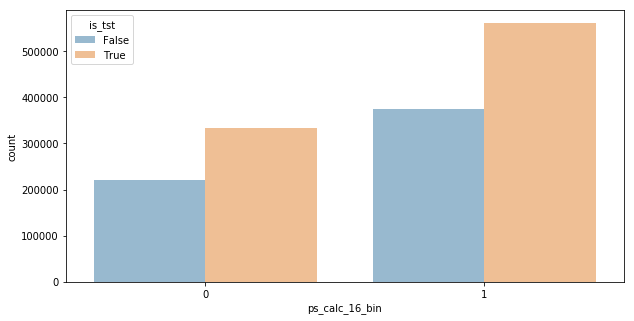

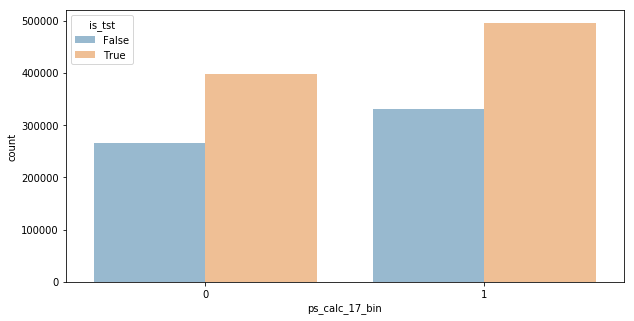

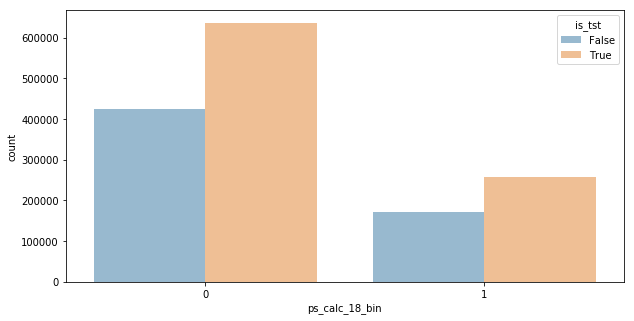

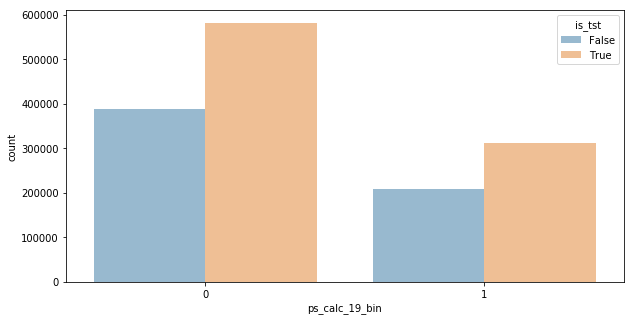

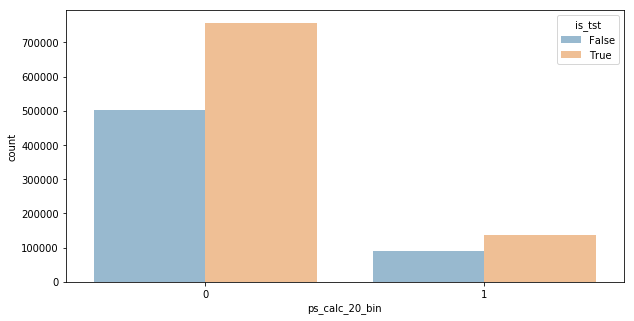

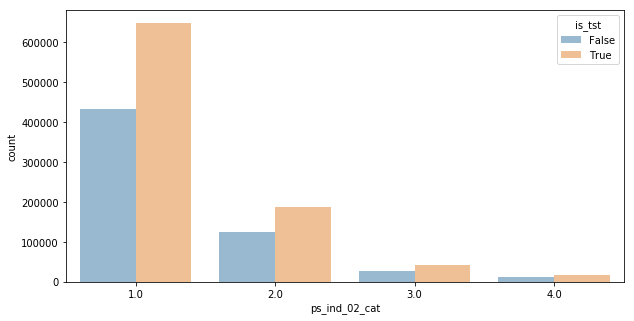

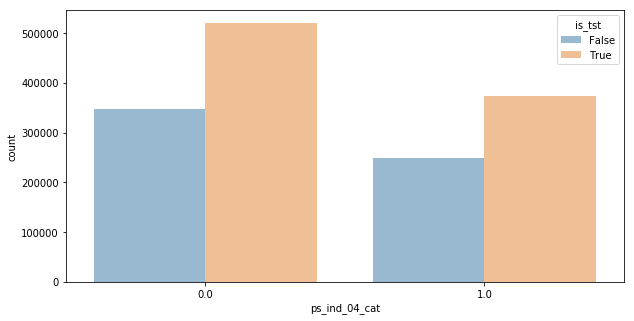

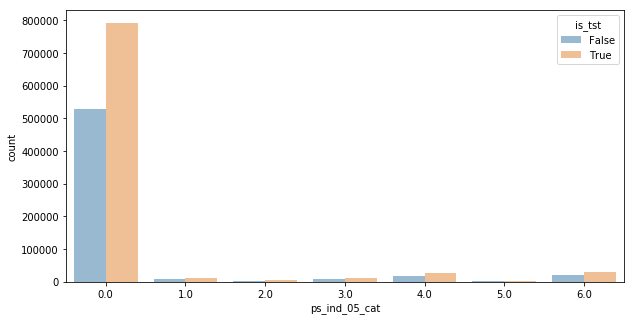

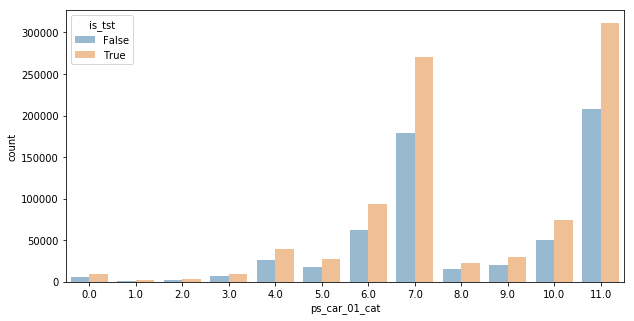

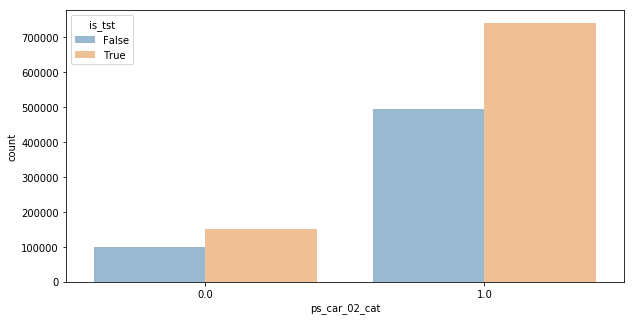

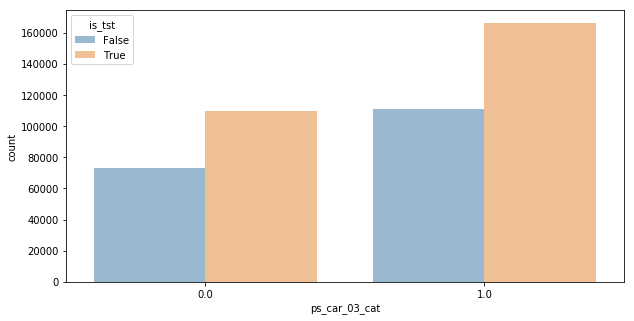

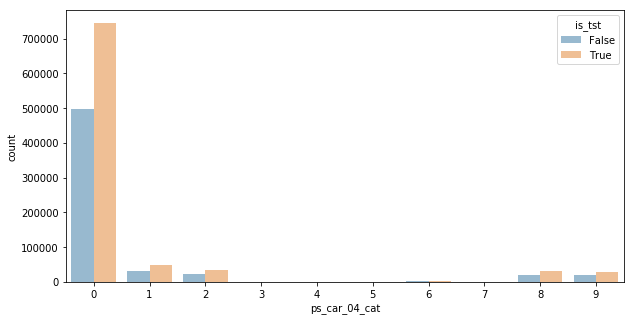

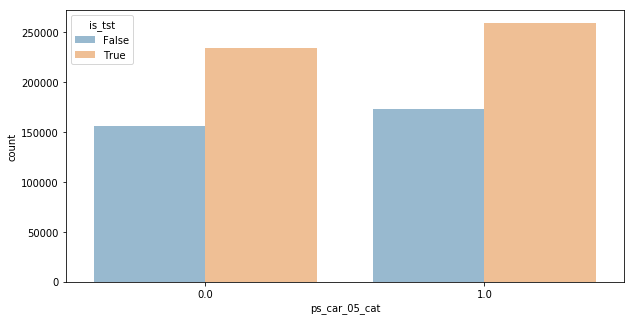

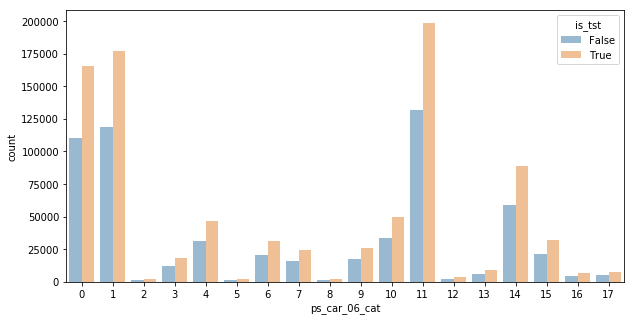

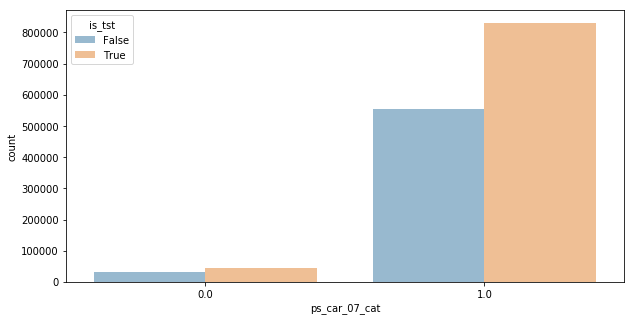

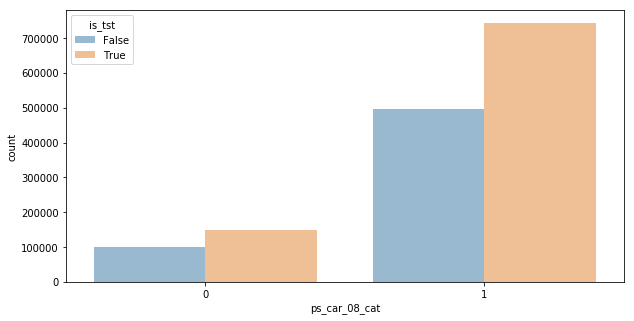

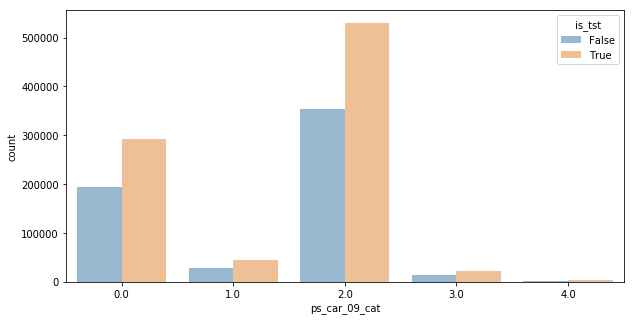

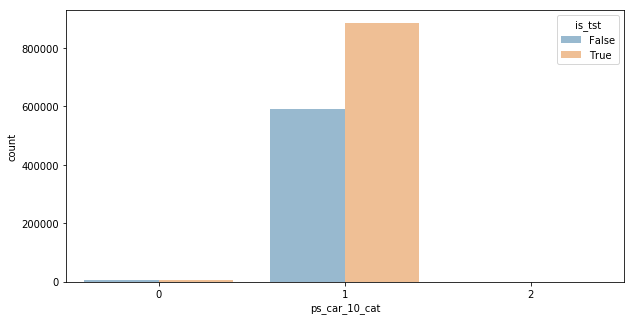

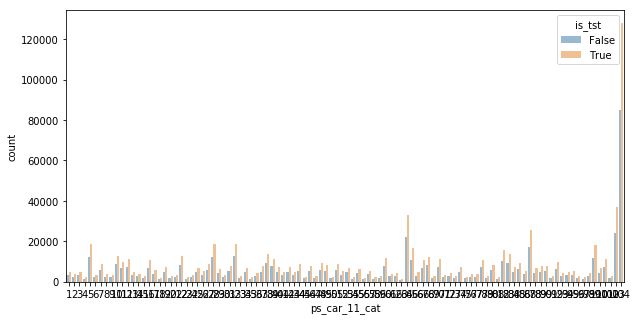

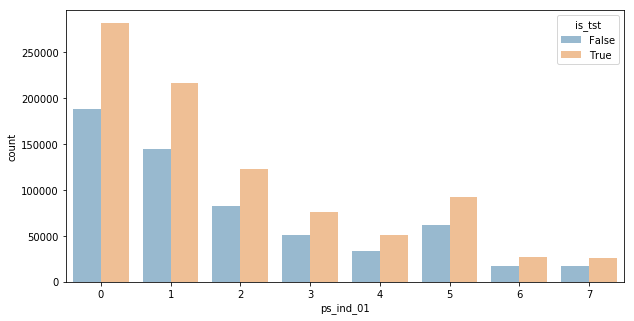

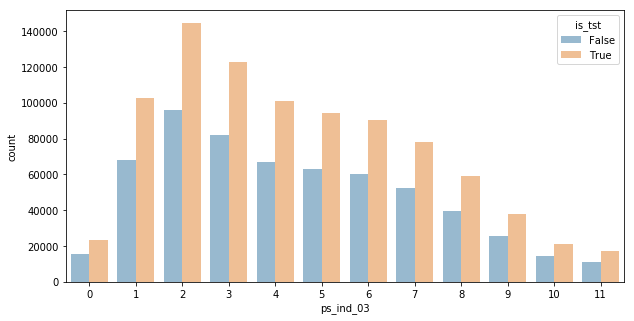

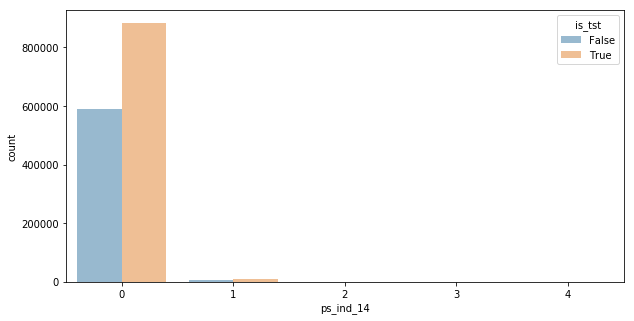

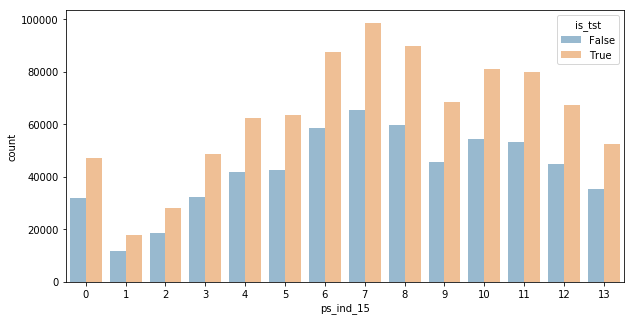

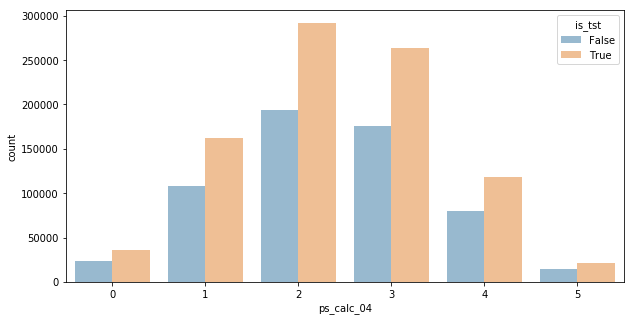

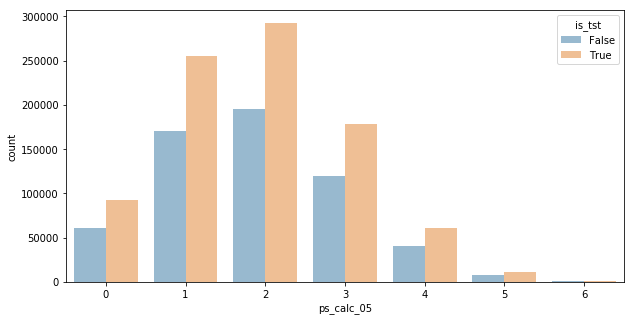

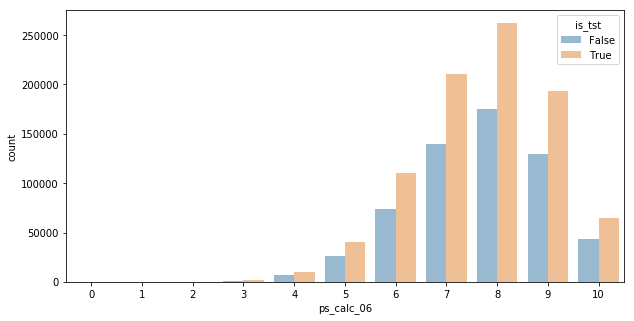

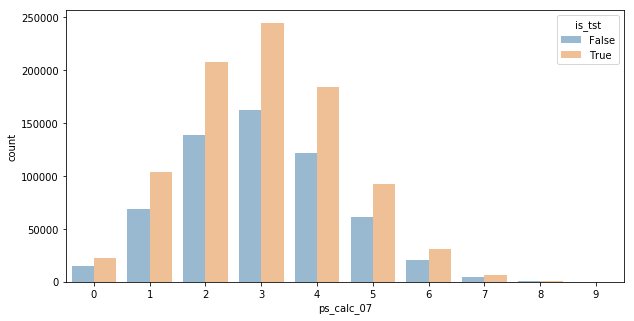

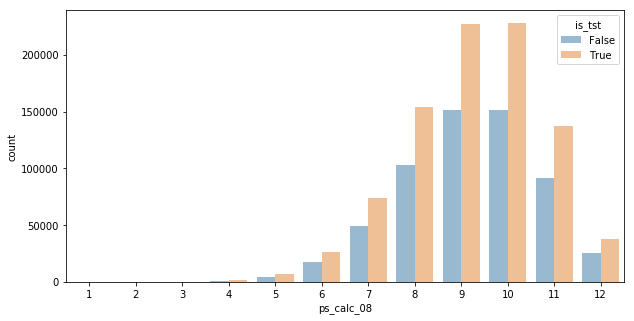

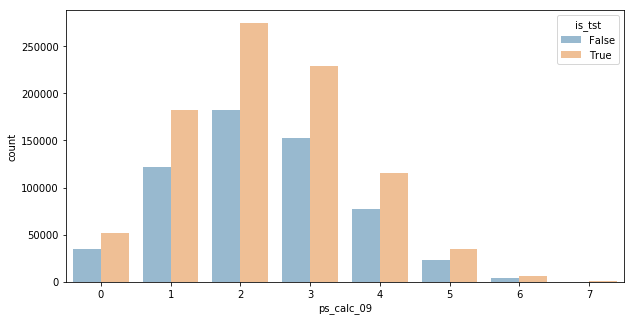

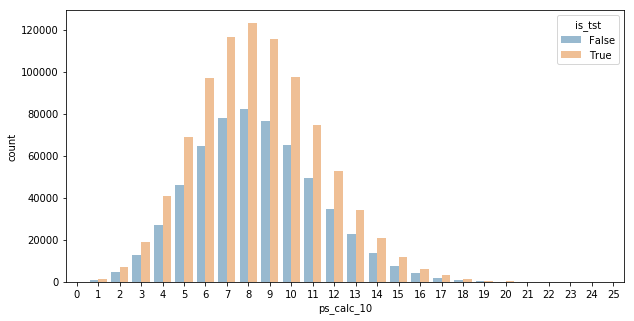

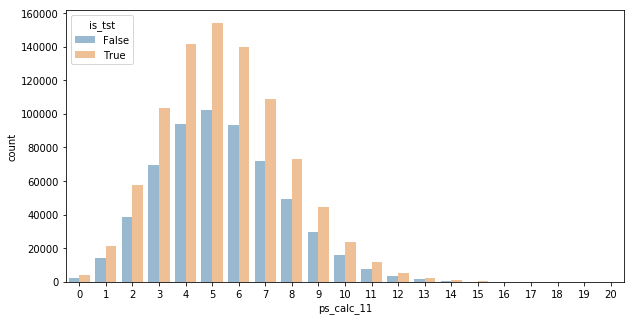

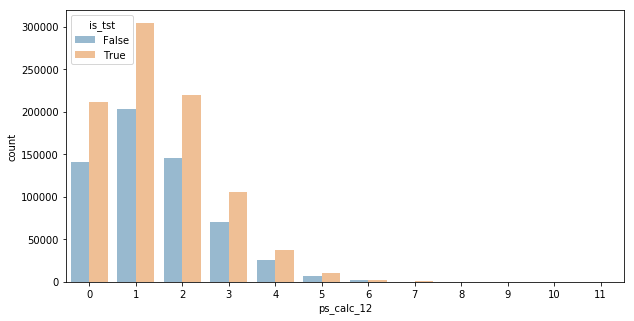

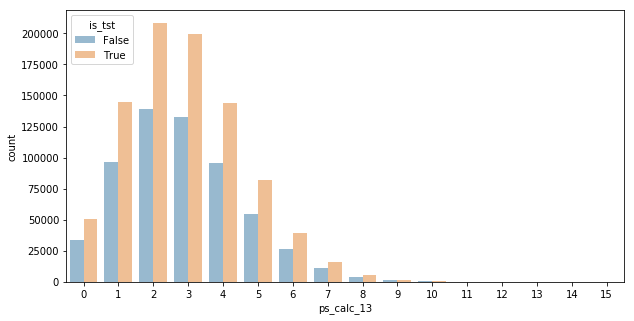

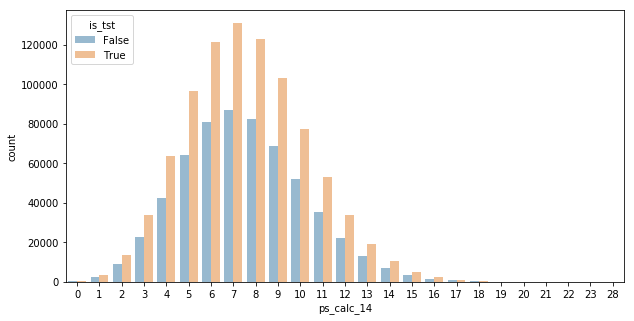

In [102]:
# 훈련 데이터 vs 테스트 데이터
df['is_tst'] = df['target'].isnull()
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')